<a href="https://colab.research.google.com/github/pymoux/wildfires_DST/blob/Michael/wildfires_ipynb_MDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0.Introduction**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

**Import data source** :
[https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires](https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires)

In [ ]:
# Create connection
con = sqlite3.connect("/content/drive/MyDrive/Data_Scientest/FPA_FOD_20170508.sqlite")

# Create a DataFrame
df = pd.read_sql_query("SELECT * FROM fires", con, index_col='OBJECTID')
pd.set_option('display.max_columns', None)

# Close connection
con.close()

## **0. Study with extended data**

**Import additional data source** : https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.6

In [ ]:
# Create connection
#con = sqlite3.connect("/content/drive/MyDrive/Data_Scientest/FPA_FOD_20170508.sqlite")
con = sqlite3.connect("/content/drive/MyDrive/Data_Scientest/FPA_FOD_20221014.sqlite")

# Create a DataFrame
#df = pd.read_sql_query("SELECT * FROM fires", con, index_col='OBJECTID')
df_bis = pd.read_sql_query("SELECT * FROM fires", con, index_col='OBJECTID')
pd.set_option('display.max_columns', None)

# Close connection
con.close()

In [ ]:
df_bis.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [ ]:
df_bis['FIRE_YEAR'].unique()

array([2005, 2004, 2006, 2008, 2002, 2007, 2009, 2001, 2003, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

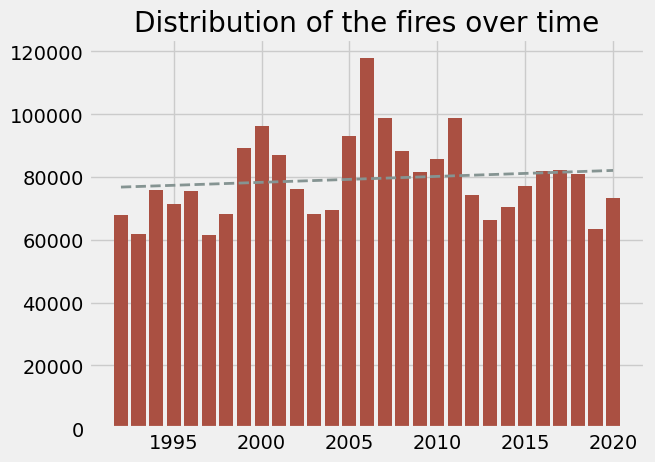

In [ ]:
# Distribution of fires per year
plt.style.available
plt.style.use('fivethirtyeight')

x = range(1992, 2021)
h = df_bis['FIRE_YEAR'].value_counts(sort=False).sort_index().to_list()

plt.bar(x, h, color='#AA5042')
plt.title('Distribution of the fires over time')

# fitting a linear regression line
m, b = np.polyfit(x, h, 1)
# adding the regression line to the scatter plot
plt.plot(x, m*x + b, '--', linewidth=2, color='#859492')

## **1. Data exploration**

In [ ]:
# Quick exploration of the dataset to get the sense of the contents
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [ ]:
# Summary of the dataframe
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 1 to 1880465
Data columns (total 38 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   FOD_ID                      1880465 non-null  int64  
 1   FPA_ID                      1880465 non-null  object 
 2   SOURCE_SYSTEM_TYPE          1880465 non-null  object 
 3   SOURCE_SYSTEM               1880465 non-null  object 
 4   NWCG_REPORTING_AGENCY       1880465 non-null  object 
 5   NWCG_REPORTING_UNIT_ID      1880465 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME    1880465 non-null  object 
 7   SOURCE_REPORTING_UNIT       1880465 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME  1880465 non-null  object 
 9   LOCAL_FIRE_REPORT_ID        421179 non-null   object 
 10  LOCAL_INCIDENT_ID           1059644 non-null  object 
 11  FIRE_CODE                   324829 non-null   object 
 12  FIRE_NAME                   923276 non-null   object 
 1

In [ ]:
df.FIRE_SIZE.describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: FIRE_SIZE, dtype: float64

In [ ]:
# Overview of the NaN values in each columns
df.isna().sum()

FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY                       891531
CONT_TIME   

In [ ]:
# Percentage of missing values in each columns
df.isnull().mean()*100

FOD_ID                         0.000000
FPA_ID                         0.000000
SOURCE_SYSTEM_TYPE             0.000000
SOURCE_SYSTEM                  0.000000
NWCG_REPORTING_AGENCY          0.000000
NWCG_REPORTING_UNIT_ID         0.000000
NWCG_REPORTING_UNIT_NAME       0.000000
SOURCE_REPORTING_UNIT          0.000000
SOURCE_REPORTING_UNIT_NAME     0.000000
LOCAL_FIRE_REPORT_ID          77.602402
LOCAL_INCIDENT_ID             43.649895
FIRE_CODE                     82.726134
FIRE_NAME                     50.901718
ICS_209_INCIDENT_NUMBER       98.632413
ICS_209_NAME                  98.632413
MTBS_ID                       99.414879
MTBS_FIRE_NAME                99.414879
COMPLEX_NAME                  99.724377
FIRE_YEAR                      0.000000
DISCOVERY_DATE                 0.000000
DISCOVERY_DOY                  0.000000
DISCOVERY_TIME                46.937220
STAT_CAUSE_CODE                0.000000
STAT_CAUSE_DESCR               0.000000
CONT_DATE                     47.410135


In [ ]:
# First row of the DataFrame
df.iloc[0]

FOD_ID                                                                        1
FPA_ID                                                               FS-1418826
SOURCE_SYSTEM_TYPE                                                          FED
SOURCE_SYSTEM                                                       FS-FIRESTAT
NWCG_REPORTING_AGENCY                                                        FS
NWCG_REPORTING_UNIT_ID                                                  USCAPNF
NWCG_REPORTING_UNIT_NAME                                 Plumas National Forest
SOURCE_REPORTING_UNIT                                                      0511
SOURCE_REPORTING_UNIT_NAME                               Plumas National Forest
LOCAL_FIRE_REPORT_ID                                                          1
LOCAL_INCIDENT_ID                                                        PNF-47
FIRE_CODE                                                                  BJ8K
FIRE_NAME                               

In [ ]:
# Check duplicated lines
print("Number of duplicated lines :", df.duplicated().sum())


Number of duplicated lines : 0


In [ ]:
# Check number of duplicated lines according to the wording "unique","uniquerly" available in the columns description
print("Number of duplicated lines in FOD_ID :",df.FOD_ID.duplicated().sum())
print("Number of duplicated lines in FPA_ID :",df.FPA_ID.duplicated().sum())
print("Number of duplicated lines in LOCAL_FIRE_REPORT_ID :",df.LOCAL_FIRE_REPORT_ID.duplicated().sum())
print("Number of duplicated line in LOCAL_INCIDENT_ID :",df.LOCAL_INCIDENT_ID.duplicated().sum())

Number of duplicated lines in FOD_ID : 0
Number of duplicated lines in FPA_ID : 3
Number of duplicated lines in LOCAL_FIRE_REPORT_ID : 1866956
Number of duplicated line in LOCAL_INCIDENT_ID : 1314550


In [ ]:
display(df[df['FPA_ID'].duplicated() == True])

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1565830,201432072,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,040,8,G0QG,SAN MATEO,None,None,None,None,None,2012,2456111.5,185,1500,1.0,Lightning,2456112.5,186.0,1400,0.10,A,35.337222,-107.779444,5.0,USFS,NM,031,031,McKinley,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xf1Z\...
1634980,201750002,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,Fort Riley,None,None,None,TRAINING AREA 60,KS-DDQ-128,Training Area 60,None,None,None,2012,2455990.5,64,1300,13.0,Missing/Undefined,2456020.5,94.0,1500,2200.00,F,39.220000,-96.940000,6.0,OTHER FEDERAL,KS,Riley,161,Riley,b'\x00\x01\xad\x10\x00\x00X\x8f\xc2\xf5(<X\xc0...
1870333,300306586,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,None,LNU003791,None,None,None,None,None,None,None,2015,2457204.5,182,1751,13.0,Missing/Undefined,NaN,NaN,None,0.01,A,38.342004,-121.958596,14.0,MISSING/NOT SPECIFIED,CA,SOLANO,095,Solano,b'\x00\x01\xad\x10\x00\x00\xe0\x84\t\xa3Y}^\xc...


In [ ]:
# Check the unique values of each row for each column
n = df.nunique(axis=0)
print("No. of unique values in each column :\n", n)

No. of unique values in each column :
 FOD_ID                        1880465
FPA_ID                        1880462
SOURCE_SYSTEM_TYPE                  3
SOURCE_SYSTEM                      38
NWCG_REPORTING_AGENCY              11
NWCG_REPORTING_UNIT_ID           1640
NWCG_REPORTING_UNIT_NAME         1635
SOURCE_REPORTING_UNIT            4992
SOURCE_REPORTING_UNIT_NAME       4441
LOCAL_FIRE_REPORT_ID            13508
LOCAL_INCIDENT_ID              565914
FIRE_CODE                      172446
FIRE_NAME                      493633
ICS_209_INCIDENT_NUMBER         22737
ICS_209_NAME                    19573
MTBS_ID                         10481
MTBS_FIRE_NAME                   8133
COMPLEX_NAME                     1416
FIRE_YEAR                          24
DISCOVERY_DATE                   8766
DISCOVERY_DOY                     366
DISCOVERY_TIME                   1440
STAT_CAUSE_CODE                    13
STAT_CAUSE_DESCR                   13
CONT_DATE                        8760
CONT_DOY   

To analyse the discrepancies between the theoretical unique values of 'DISCOVERY_TIME' & 'CONT_TIME' (1440 correspond to the exact number of minutes within a days of 24hours) we will print the unique list

## **2. Check inconsistency**

In [ ]:
# Check the total unique values of 'DISCOVERY_TIME'
# Since 1441 uniques values has been determined and the limit of printing .tolist is 1000 we split it in two batch [:800],[800:]
first_800_unique = df['DISCOVERY_TIME'].unique()[:800].tolist()
print(first_800_unique)

last_800_unique = df['DISCOVERY_TIME'].unique()[800:].tolist()
print(last_800_unique)

['1300', '0845', '1921', '1600', '1800', '1200', '1830', '1730', '0630', '0930', '1415', '1618', '2000', '1030', '1530', '1440', '1910', '1250', '1712', '1405', '1145', '0945', '1655', '1515', '1645', '0943', '1927', '1015', '1042', '1500', '2200', '1900', '1520', '1625', '1343', '1205', '1330', '1000', '1535', '1640', '1441', '1400', '1539', '1615', '1430', '1334', '1510', '1845', '1234', '1100', '1241', '1654', '1232', '1930', '0800', '0715', '1540', '2030', '1616', '1745', '1713', '1007', '1050', '1412', '0915', '1225', '0530', '1731', '1230', '0710', '1650', '1648', '0905', '0909', '1700', '0950', '1810', '0015', '1901', '1820', '1340', '1534', '0900', '1630', '2015', '1240', '1907', '0810', '1715', '1605', '1354', '1345', '1925', '1155', '1720', '1130', '1739', '1755', '1054', '1301', '1322', '1556', '1550', '1338', '1525', '0825', '0815', '1628', '1141', '1118', '1705', '1337', '1915', '1522', '1636', '1523', '0805', '0835', '1310', '1528', '1756', '1609', '1245', '1551', '1702',

In [ ]:
# Check the total unique values of 'CONT_TIME'
# Since 1441 uniques values has been determined and the limit of printing .tolist is 1000 we split it in two batch [:800],[800:]
last_800_unique = df['CONT_TIME'].unique()[:800].tolist()
print(first_800_unique)

last_800_unique = df['CONT_TIME'].unique()[799:].tolist()
print(last_800_unique)

['1300', '0845', '1921', '1600', '1800', '1200', '1830', '1730', '0630', '0930', '1415', '1618', '2000', '1030', '1530', '1440', '1910', '1250', '1712', '1405', '1145', '0945', '1655', '1515', '1645', '0943', '1927', '1015', '1042', '1500', '2200', '1900', '1520', '1625', '1343', '1205', '1330', '1000', '1535', '1640', '1441', '1400', '1539', '1615', '1430', '1334', '1510', '1845', '1234', '1100', '1241', '1654', '1232', '1930', '0800', '0715', '1540', '2030', '1616', '1745', '1713', '1007', '1050', '1412', '0915', '1225', '0530', '1731', '1230', '0710', '1650', '1648', '0905', '0909', '1700', '0950', '1810', '0015', '1901', '1820', '1340', '1534', '0900', '1630', '2015', '1240', '1907', '0810', '1715', '1605', '1354', '1345', '1925', '1155', '1720', '1130', '1739', '1755', '1054', '1301', '1322', '1556', '1550', '1338', '1525', '0825', '0815', '1628', '1141', '1118', '1705', '1337', '1915', '1522', '1636', '1523', '0805', '0835', '1310', '1528', '1756', '1609', '1245', '1551', '1702',

In [ ]:
  # Check the empty 'CONT_TIME'
  df.loc[df['CONT_TIME']=='']

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1564597,201430827,FS-1510593,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,006,1701-05,EKT5,ROUND KNOB,None,None,None,None,None,2012,2456117.5,191,1248,1.0,Lightning,NaN,NaN,,0.50,B,45.482222,-116.433056,5.0,USFS,ID,049,049,Idaho,"b""\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\x1b]\..."
1564654,201430884,FS-1510201,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,087,1706-29,EKT5,TROUT PEAK,ID-NPF-000565,Trout Peak,ID4616011488520120910,WEST TROUT,None,2012,2456171.5,245,0928,1.0,Lightning,NaN,NaN,,717.00,E,46.156667,-114.853056,5.0,USFS,ID,049,049,Idaho,b'\x00\x01\xad\x10\x00\x00\xbc\xf7Xv\x98\xb6\\...
1564659,201430889,FS-1510393,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,038,1706-13,G42D,DITCH,ID-NPF-000287,Ditch,ID4597711487820120728,DITCH,None,2012,2456136.5,210,1313,1.0,Lightning,NaN,NaN,,12000.00,G,46.003333,-114.878611,5.0,USFS,ID,049,049,Idaho,b'\x00\x01\xad\x10\x00\x00\x88\xd6\x17*;\xb8\\...
1564764,201430995,FS-1506457,FED,FS-FIRESTAT,FS,USSDBKF,Black Hills National Forest,0203,Black Hills National Forest,050,7,G0FV,PARKER PEAK,SD-BKF-120501,Parker Peak,None,None,None,2012,2456109.5,183,2200,1.0,Lightning,NaN,NaN,,650.00,E,43.385556,-103.687778,5.0,USFS,SD,047,047,Fall River,b'\x00\x01\xad\x10\x00\x00\xfc\x00\x18\x8d\x04...
1564766,201430997,FS-1510166,FED,FS-FIRESTAT,FS,USSDBKF,Black Hills National Forest,0203,Black Hills National Forest,072,10,G2UD,MYRTLE,SD-BKF-120655,Myrtle,SD4360210355020120719,MYRTLE,None,2012,2456127.5,201,1414,2.0,Equipment Use,NaN,NaN,,9886.00,G,43.601667,-103.549722,5.0,USFS,SD,033,033,Custer,b'\x00\x01\xad\x10\x00\x0042\x1b\xa6.\xe3Y\xc0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804860,300218357,FWS-2015USTXSTR2032,FED,FWS-FMIS,FWS,USTXSTR,Santa Ana National Wildlife Refuge,USTXSTR,SANTA ANA NWR,None,None,2032,NORTH BOBCAT,None,None,None,None,None,2015,2457254.5,232,0000,1.0,Lightning,NaN,NaN,,0.12,A,26.073611,-98.152222,4.0,FWS,TX,Hidalgo,215,Hidalgo,b'\x00\x01\xad\x10\x00\x00\xd0\xeeW\x01\xbe\x8...
1804862,300218359,FWS-2015USSDWDR6028,FED,FWS-FMIS,FWS,USSDWDR,Waubay Wetland Management District,USSDWDR,WAUBAY WMD,None,None,6028,HARSTED-ELTON,None,None,None,None,None,2015,2457343.5,321,0000,9.0,Miscellaneous,NaN,NaN,,8.70,B,45.793926,-96.991940,4.0,FWS,SD,Roberts,109,Roberts,b'\x00\x01\xad\x10\x00\x00\x04\xe6\xe8\xf1{?X\...
1804896,300218396,FWS-2015USCASJR8012,FED,FWS-FMIS,FWS,USCASJR,San Joaquin River National Wildlife Refuge,USCASJR,SAN JOAQUIN RIV NWR,None,None,8012,INLET CANAL,None,None,None,None,None,2015,2457180.5,158,0000,13.0,Missing/Undefined,NaN,NaN,,1.00,B,37.604844,-121.178436,4.0,FWS,CA,Stanislaus,099,Stanislaus,b'\x00\x01\xad\x10\x00\x00t\x1b\xd4~kK^\xc0P\x...


Observation :

DISCOVERY_TIME : unique value "None" is available
CONT_TIME : unique values "None" and "" are available

To analyse the discrepancies between the theoretical unique values of 'DISCOVERY_DATE' & 'CONT_DATE' (8766 correspond to the exact number of days for the studied period (01/01/1992 - 31/12/2015) we will print the unique list

In [ ]:
# Check the total unique values of 'DISCOVERY_DATE'
# Since 8766 uniques values has been determined and the limit of printing .tolist is 1000 we split it in five batch [:2000],[2000:4000],[4000:6000],[6000:8000],[8000:10000]
disco_2000 = df['DISCOVERY_DATE'].unique()[:2000].tolist()
disco_2000_4000 = df['DISCOVERY_DATE'].unique()[2000:4000].tolist()
disco_4000_6000 = df['DISCOVERY_DATE'].unique()[4000:6000].tolist()
disco_6000_8000 = df['DISCOVERY_DATE'].unique()[6000:8000].tolist()
disco_8000_10000 = df['DISCOVERY_DATE'].unique()[8000:10000].tolist()
print(disco_2000)
print(disco_2000_4000)
print(disco_4000_6000)
print(disco_6000_8000)
print(disco_8000_10000)

[2453403.5, 2453137.5, 2453156.5, 2453184.5, 2453186.5, 2453187.5, 2453437.5, 2453444.5, 2453188.5, 2453251.5, 2453276.5, 2453281.5, 2453284.5, 2453291.5, 2453329.5, 2453160.5, 2453175.5, 2453177.5, 2453181.5, 2453206.5, 2453082.5, 2453222.5, 2453136.5, 2453406.5, 2453247.5, 2453289.5, 2453434.5, 2453440.5, 2453397.5, 2453407.5, 2453413.5, 2453476.5, 2453499.5, 2453465.5, 2453527.5, 2453535.5, 2453417.5, 2453431.5, 2453518.5, 2453507.5, 2453517.5, 2453467.5, 2453540.5, 2453546.5, 2453435.5, 2453545.5, 2453537.5, 2453520.5, 2453542.5, 2453549.5, 2453487.5, 2453484.5, 2453555.5, 2453556.5, 2453547.5, 2453492.5, 2453519.5, 2453552.5, 2453554.5, 2453506.5, 2453548.5, 2453474.5, 2453539.5, 2453503.5, 2453561.5, 2453560.5, 2453508.5, 2453558.5, 2453372.5, 2453565.5, 2453496.5, 2453559.5, 2453532.5, 2453543.5, 2453553.5, 2453485.5, 2453569.5, 2453550.5, 2453566.5, 2453568.5, 2453567.5, 2453534.5, 2453427.5, 2453480.5, 2453541.5, 2453538.5, 2453551.5, 2453570.5, 2453314.5, 2453564.5, 2453521.5

In [ ]:
# Check the total unique values of 'CONT_DATE'
# Since 8760 uniques values has been determined and the limit of printing .tolist is 1000 we split it in five batch [:2000],[2000:4000],[4000:6000],[6000:8000],[8000:10000]
cont_2000 = df['CONT_DATE'].unique()[:2000].tolist()
cont_2000_4000 = df['CONT_DATE'].unique()[2000:4000].tolist()
cont_4000_6000 = df['CONT_DATE'].unique()[4000:6000].tolist()
cont_6000_8000 = df['CONT_DATE'].unique()[6000:8000].tolist()
cont_8000_10000 = df['CONT_DATE'].unique()[8000:10000].tolist()
print(cont_2000)
print(cont_2000_4000)
print(cont_4000_6000)
print(cont_6000_8000)
print(cont_8000_10000)

[2453403.5, 2453137.5, 2453156.5, 2453189.5, 2453187.5, 2453188.5, 2453437.5, 2453444.5, 2453251.5, 2453276.5, 2453281.5, 2453299.5, 2453295.5, 2453330.5, 2453160.5, 2453175.5, 2453178.5, 2453182.5, 2453192.5, 2453206.5, 2453082.5, 2453222.5, 2453136.5, 2453407.5, 2453247.5, 2453289.5, 2453434.5, 2453440.5, 2453398.5, 2453414.5, 2453476.5, 2453499.5, 2453465.5, 2453527.5, 2453535.5, 2453417.5, 2453431.5, 2453518.5, 2453507.5, 2453517.5, 2453467.5, 2453541.5, 2453547.5, 2453546.5, 2453435.5, 2453545.5, 2453538.5, 2453521.5, 2453542.5, 2453549.5, 2453487.5, 2453484.5, 2453555.5, 2453556.5, 2453492.5, 2453519.5, 2453552.5, 2453554.5, 2453506.5, 2453548.5, 2453474.5, 2453540.5, 2453503.5, 2453561.5, 2453560.5, 2453508.5, nan, 2453559.5, 2453372.5, 2453565.5, 2453532.5, 2453543.5, 2453553.5, 2453485.5, 2453566.5, 2453570.5, 2453550.5, 2453569.5, 2453528.5, 2453558.5, 2453568.5, 2453567.5, 2453534.5, 2453520.5, 2453537.5, 2453427.5, 2453480.5, 2453551.5, 2453314.5, 2453573.5, 2453572.5, 2453

Calculate the estimated total of burned surfaces

In [ ]:
S = df['FIRE_SIZE'].sum()
print("The estimated total surface burned over the 15 years is of :", round(S/1000000), "million acres")

The estimated total surface burned over the 15 years is of : 140 million acres


In [ ]:
indices_disco  = [index for (index, item) in enumerate(df['DISCOVERY_TIME']) if item == None]

print(indices_disco)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
indices_cont  = [index for (index, item) in enumerate(df['CONT_TIME']) if item == '']

print(indices_cont)

[1564596, 1564653, 1564658, 1564763, 1564765, 1564770, 1564772, 1564788, 1564871, 1564875, 1564890, 1564897, 1565268, 1565306, 1565377, 1565807, 1565823, 1565835, 1566134, 1566177, 1566202, 1566204, 1566642, 1566784, 1566812, 1566817, 1567109, 1568559, 1568632, 1568661, 1569564, 1569566, 1569575, 1569599, 1569696, 1569708, 1569718, 1569727, 1569747, 1569894, 1569905, 1569911, 1569937, 1569977, 1570008, 1570243, 1571167, 1571484, 1571763, 1571764, 1571765, 1571770, 1572092, 1573455, 1573720, 1573721, 1573724, 1573730, 1573731, 1573732, 1575509, 1578332, 1578335, 1579686, 1579687, 1579928, 1581832, 1634978, 1634993, 1634998, 1635004, 1635005, 1635019, 1635020, 1635021, 1635022, 1635029, 1635030, 1635032, 1635659, 1635811, 1635818, 1635997, 1636275, 1636317, 1636458, 1636642, 1636653, 1636674, 1636685, 1636774, 1636930, 1637365, 1637397, 1637847, 1637903, 1638411, 1638477, 1638578, 1638697, 1638745, 1638932, 1639133, 1639172, 1639357, 1639370, 1639394, 1639754, 1639768, 1639810, 1639824, 

In [ ]:
df.loc[[1564596, 1564653, 1564658, 1564763, 1564765, 1564770, 1564772, 1564788, 1564871, 1564875],['DISCOVERY_TIME', 'CONT_TIME']]

,DISCOVERY_TIME,CONT_TIME
OBJECTID,,
1564596,0800,0700
1564653,1512,0550
1564658,1626,1600
1564763,2230,0430
1564765,1730,1000
1564770,1300,1945
1564772,0215,0630
1564788,1900,2100
1564871,0230,1430


In [ ]:
df[df['CONT_TIME'].isnull()]

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
85,86,FS-1419068,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,0114,Kootenai National Forest,39,013,BYE0,HWY 2,None,None,None,None,None,2005,2453555.5,185,0530,9.0,Miscellaneous,NaN,NaN,None,0.3,B,48.228056,-115.480278,13.0,STATE OR PRIVATE,MT,53,053,Lincoln,b'\x00\x01\xad\x10\x00\x00\x1c\x86\x03\xdf\xbc...
1507,1521,FS-1422198,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,0905,Mark Twain National Forest,55,WS-05-22,BLE3,PARTY JUNCTION,None,None,None,None,None,2005,2453440.5,70,1400,4.0,Campfire,NaN,NaN,None,0.1,A,37.029722,-92.125556,5.0,USFS,MO,67,067,Douglas,b'\x00\x01\xad\x10\x00\x00\xf8\x010\x1a\t\x08W...
1508,1522,FS-1422199,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,0905,Mark Twain National Forest,54,WS-05-23,BLD7,BROWN BOTTLE 2,None,None,None,None,None,2005,2453440.5,70,1720,7.0,Arson,NaN,NaN,None,0.1,A,36.829722,-92.074167,5.0,USFS,MO,91,091,Howell,b'\x00\x01\xad\x10\x00\x00\x98\x86\x8f%\xbf\x0...
1553,1567,FS-1422292,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,0905,Mark Twain National Forest,73,AVA-05-27,BLX7,BENCHMARK,None,None,None,None,None,2005,2453444.5,74,1400,5.0,Debris Burning,NaN,NaN,None,0.5,B,36.671944,-92.599722,5.0,USFS,MO,153,153,Ozark,b'\x00\x01\xad\x10\x00\x00heN\xd9a&W\xc0\xc0C\...
1556,1570,FS-1422297,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,0905,Mark Twain National Forest,74,AVA-05-28,BLX9,HARMON RIDGE GATE,None,None,None,None,None,2005,2453445.5,75,1330,7.0,Arson,NaN,NaN,None,0.5,B,36.903889,-92.980556,5.0,USFS,MO,43,043,Christian,b'\x00\x01\xad\x10\x00\x00\x18\x87\x1bl\xc1>W\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880455,300348310,2015CAIRS28424493,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,594359,009685,None,RANCH,None,None,None,None,None,2015,2457277.5,255,0638,13.0,Missing/Undefined,NaN,NaN,None,2.0,B,38.048577,-120.313090,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x18\xad\xa3\xaa\t\x...
1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,None,None,None,None,None,None,None,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.2,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,None,None,None,None,None,None,None,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.1,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...


In [ ]:
df_cont=df[df['CONT_TIME'].isnull()]
df_cont['FIRE_SIZE'].describe()

count    972173.000000
mean         24.354608
std         660.074336
min           0.000010
25%           0.240000
50%           1.000000
75%           4.000000
max      220000.000000
Name: FIRE_SIZE, dtype: float64

In [ ]:
days = df['DISCOVERY_DATE'].max()-df['DISCOVERY_DATE'].min()+1
print(days)

8766.0


## **3. Graphic exploration**

Distribution of the fires over time


1.   Numbers of fires per year
2.   Numbers of fires per day of year
3.   Numbers of fires per day of the week

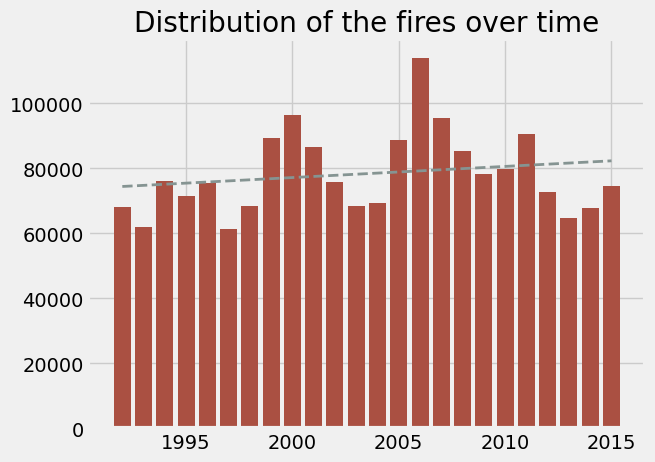

In [ ]:
# Distribution of fires per year
plt.style.available
plt.style.use('fivethirtyeight')

x = range(1992, 2016)
h = df['FIRE_YEAR'].value_counts(sort=False).sort_index().to_list()

plt.bar(x, h, color='#AA5042')
plt.title('Distribution of the fires over time')

# fitting a linear regression line
m, b = np.polyfit(x, h, 1)
# adding the regression line to the scatter plot
plt.plot(x, m*x + b, '--', linewidth=2, color='#859492')

In [ ]:
df['FIRE_YEAR'].value_counts().mean()

78352.70833333333

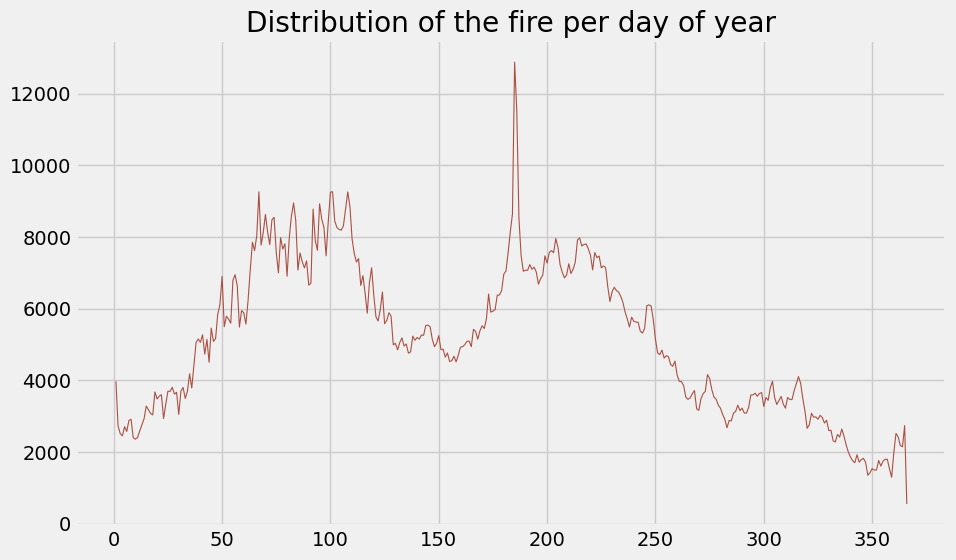

In [ ]:
# Distribution of the fires per day of year
count_per_day = df['DISCOVERY_DOY'].value_counts().sort_index()

# Creation of the graph
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.plot(count_per_day.index, count_per_day.values, linewidth=0.8, color='#AA5042')
plt.title('Distribution of the fire per day of year');

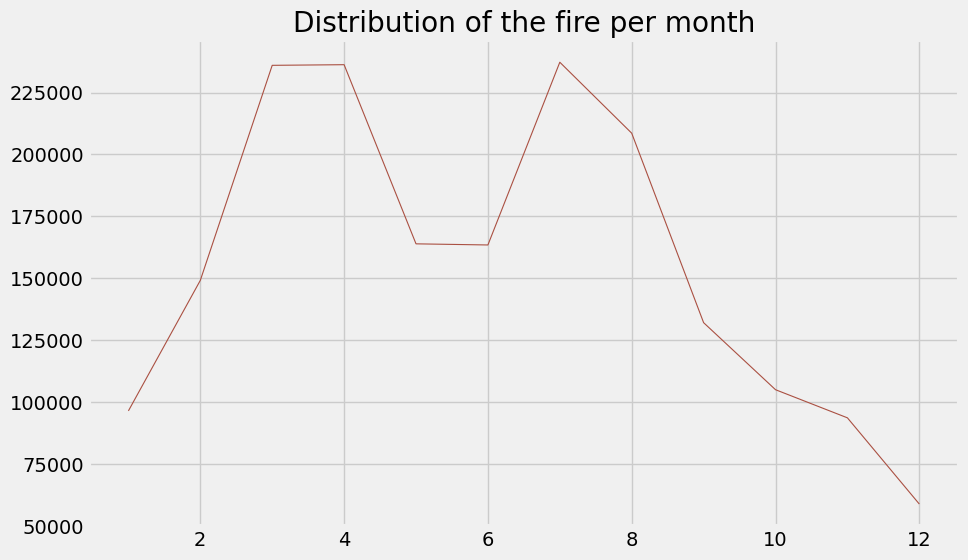

In [ ]:
# Distribution of the fires per month
count_per_month = df['MONTH'].value_counts().sort_index()

# Creation of the graph
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.plot(count_per_month.index, count_per_month.values, linewidth=0.8, color='#AA5042')
plt.title('Distribution of the fire per month');

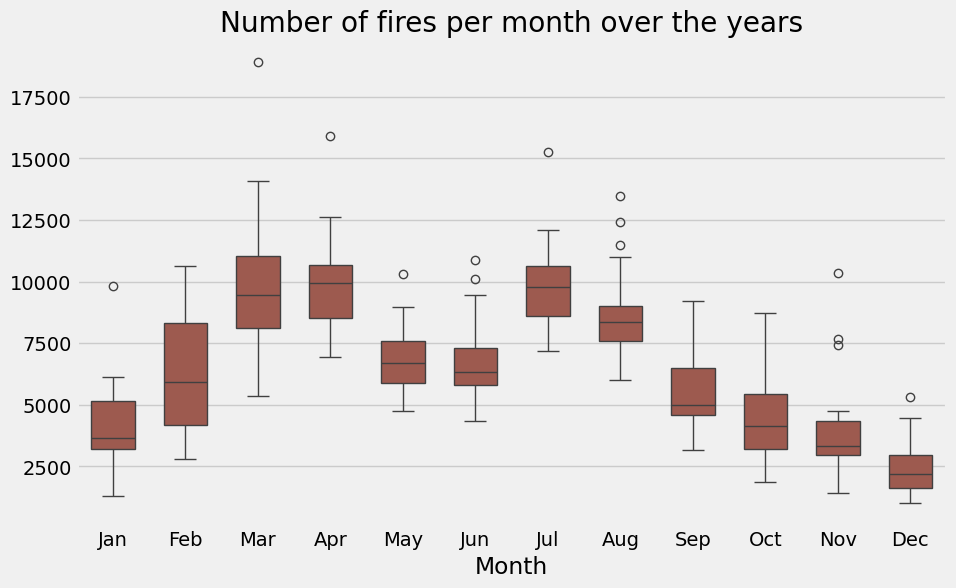

In [ ]:
# Distribution of the fires per month over the years
df_boxplot = df.groupby(['FIRE_YEAR', 'MONTH']).size().unstack(fill_value=0)
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
sns.boxplot(data=df_boxplot, width=0.6, color='#AA5042')
plt.xlabel('Month')
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of fires per month over the years');

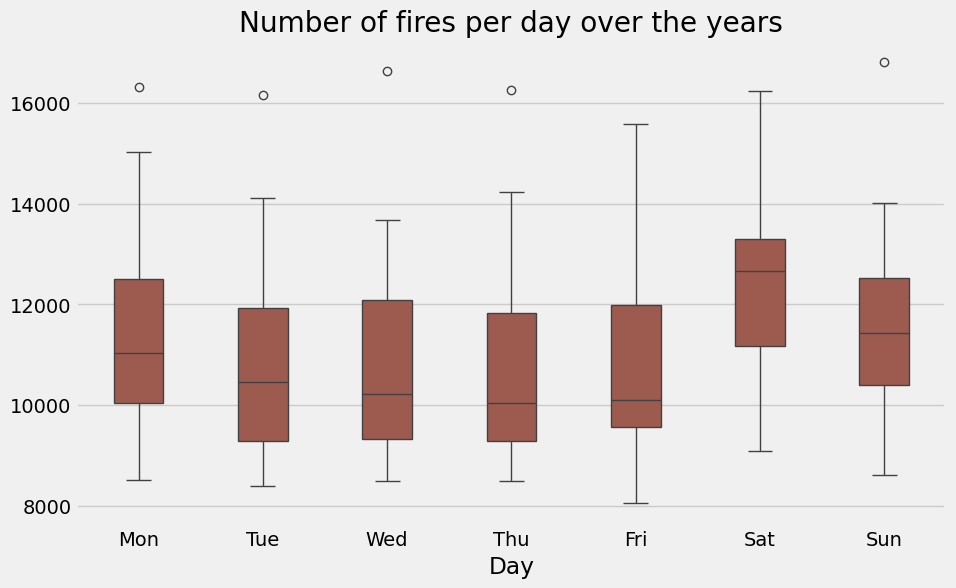

In [ ]:
# Distribution of the fires per day over the years
df_boxplot2 = df.groupby(['FIRE_YEAR', 'DAY_OF_WEEK']).size().unstack(fill_value=0)
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
sns.boxplot(data=df_boxplot2, width=0.4, color='#AA5042')
plt.xlabel('Day')
plt.xticks(range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Number of fires per day over the years');

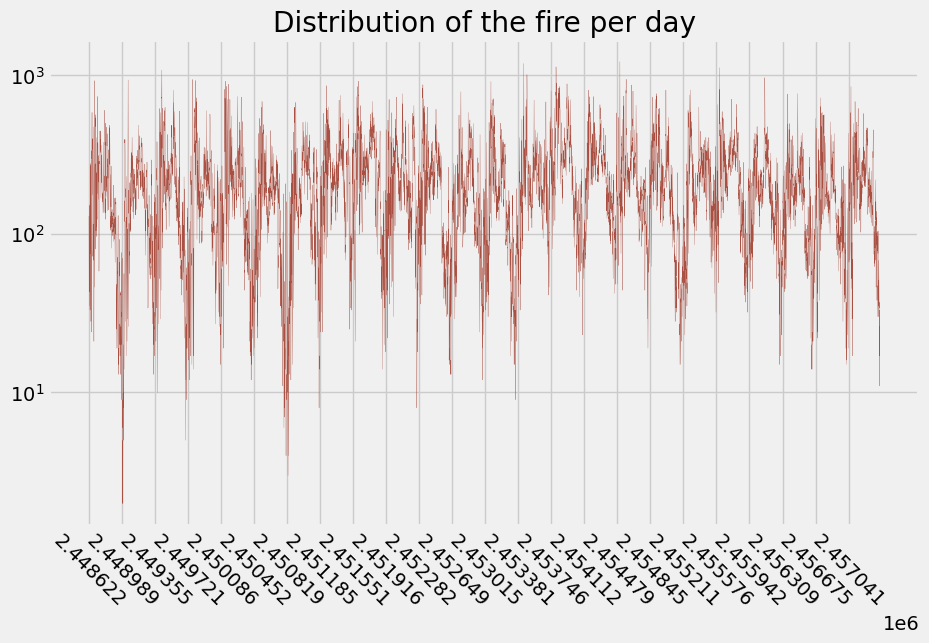

In [ ]:
# Distribution of the fires per day of year
count_per_date = df['DISCOVERY_DATE'].value_counts().sort_index()

# Creation of the graph
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.plot(count_per_date.index, count_per_date.values, linewidth=0.2, color='#AA5042')
plt.title('Distribution of the fire per day')
plt.yscale('log')
plt.xticks(np.arange(min(count_per_date.index), max(count_per_date.index)+1, 366), rotation=-45);

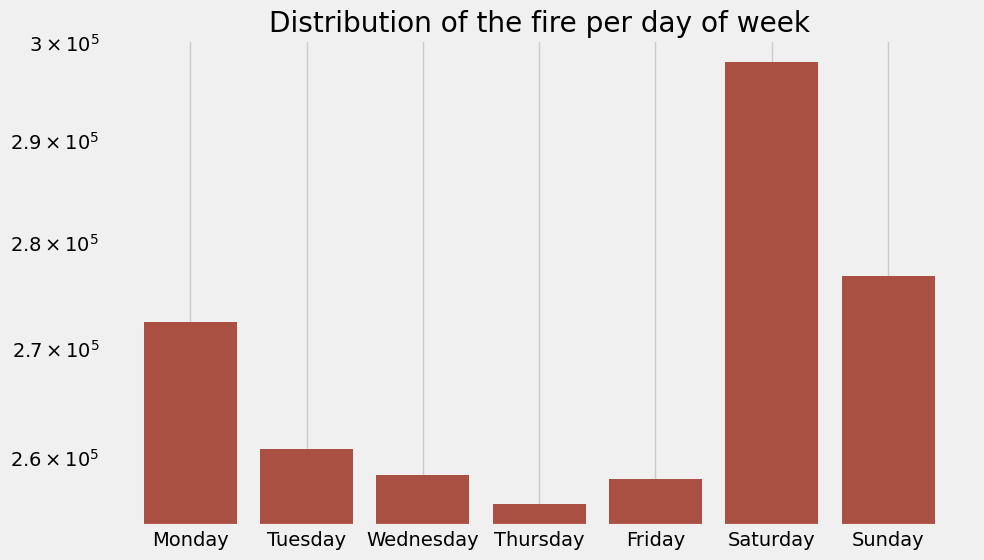

In [ ]:
# Distribution of the fire per day of the week
dow = df['DAY_OF_WEEK'].value_counts().sort_index()

# Creation of the graph
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.bar(dow.index, dow.values, linewidth=0.8, color='#AA5042')
plt.title('Distribution of the fire per day of week')
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.yscale('log');

Distribution of the fires by size


1.   Numbers of fires by fires size class
2.   Numbers of fires by fires surfaces
3.   Numbers of fires per states/counties (same fires)



Distribution of the fires by location

1.   Numbers of fires per states
2.   Numbers of fires per counties



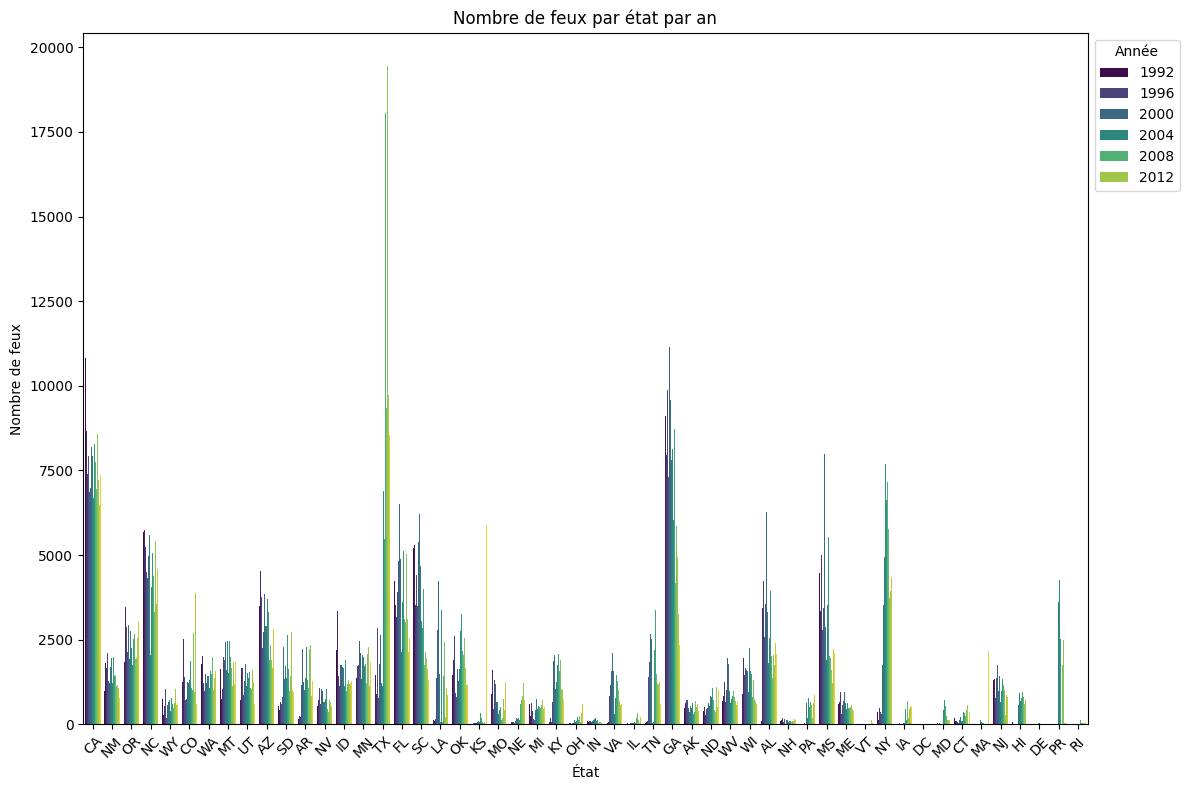

In [ ]:
# Numbers of fires per states
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='STATE', hue='FIRE_YEAR', palette='viridis')
plt.title('Nombre de feux par état par an')
plt.xlabel('État')
plt.ylabel('Nombre de feux')
plt.legend(title='Année', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

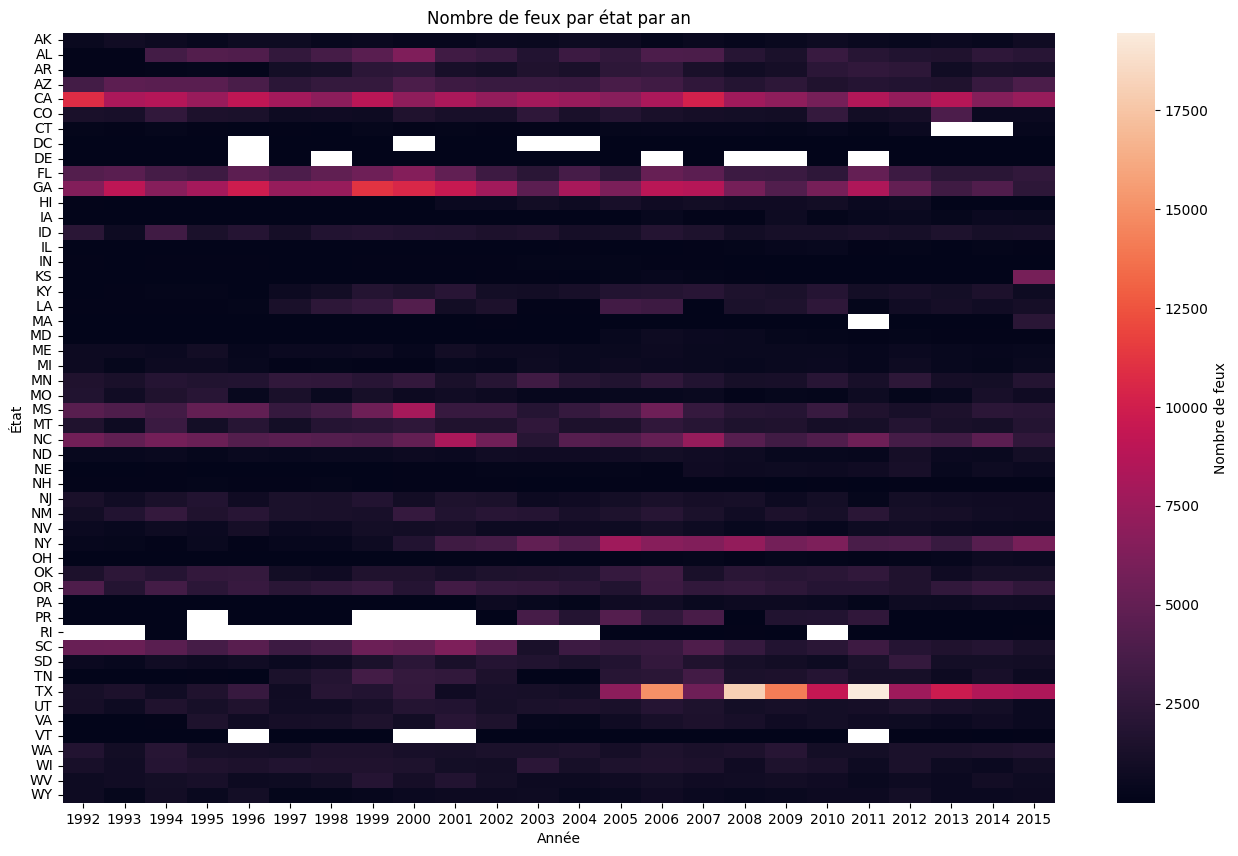

In [ ]:
# Numbers of fires per state (heatmap)
pivot_table = df.pivot_table(index='STATE', columns='FIRE_YEAR', aggfunc='size')
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='rocket', cbar_kws={'label': 'Nombre de feux'})
plt.title('Nombre de feux par état par an')
plt.xlabel('Année')
plt.ylabel('État');

Distribution of fires by causes over time
1. Numbers of fires by cause
2. Size of the fires by cause
3. Duration of the fire by cause

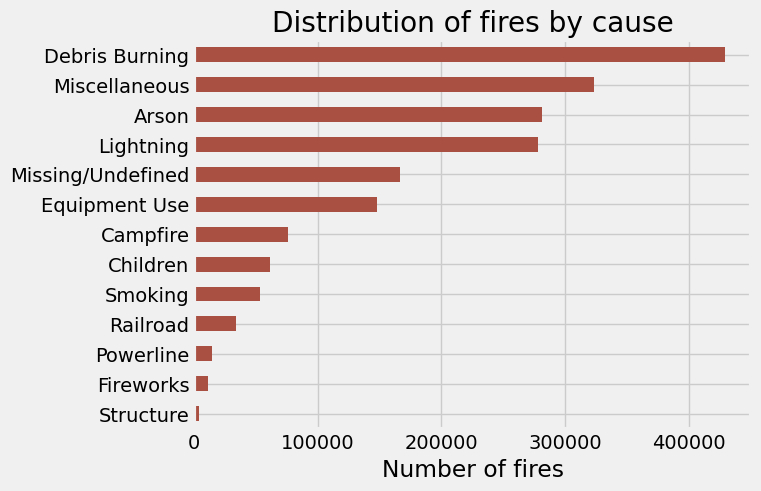

In [ ]:
# Distribution of fires by cause
df.STAT_CAUSE_DESCR.value_counts().plot(kind='barh', color='#AA5042').invert_yaxis()
plt.title('Distribution of fires by cause')
plt.xlabel('Number of fires');

<ipython-input-30-87fe239bb407>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="STAT_CAUSE_DESCR", data=df, order = df['STAT_CAUSE_DESCR'].value_counts().index, palette="viridis")


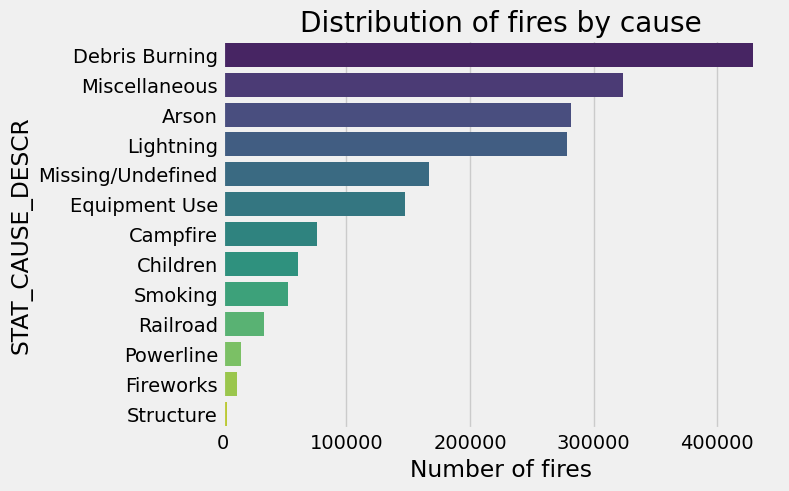

In [ ]:
# Distribution of fires by cause
import seaborn as sns
sns.countplot(y="STAT_CAUSE_DESCR", data=df, order = df['STAT_CAUSE_DESCR'].value_counts().index, palette="viridis")
plt.title('Distribution of fires by cause')
plt.xlabel('Number of fires');

Number of fire induced by human : 1435274
Number of fire naturally caused : 278468


''

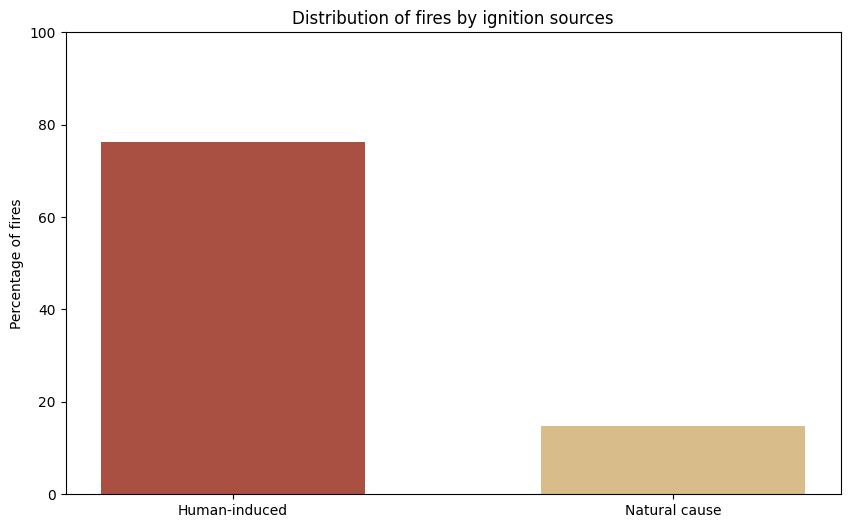

In [ ]:
# Distribution of fires by cause (human vs natural)
fire_cause = df['STAT_CAUSE_DESCR'].value_counts()
# Filter the ignition source
human_induced = ['Equipment Use', 'Smoking', 'Campfire', 'Debris Burning', 'Railroad', 'Arson', 'Children', 'Fireworks', 'Powerline', 'Structure', 'Miscellaneous']
natural_cause = ['Lightning']

# Calculate the percentage of the ignition source
human_fire = (fire_cause.loc[human_induced].sum()/df.shape[0])*100
print('Number of fire induced by human :',fire_cause.loc[human_induced].sum())

natural_fire = (fire_cause.loc[natural_cause].sum()/df.shape[0])*100
print('Number of fire naturally caused :',fire_cause.loc[natural_cause].sum())

plt.figure(figsize=(10, 6))
plt.bar('Human-induced', human_fire, width=0.6, color='#aa5042')
plt.bar('Natural cause', natural_fire, width=0.6, color='#d8bd8a')
plt.ylim(0,100)
plt.ylabel('Percentage of fires')
plt.title('Distribution of fires by ignition sources')
;

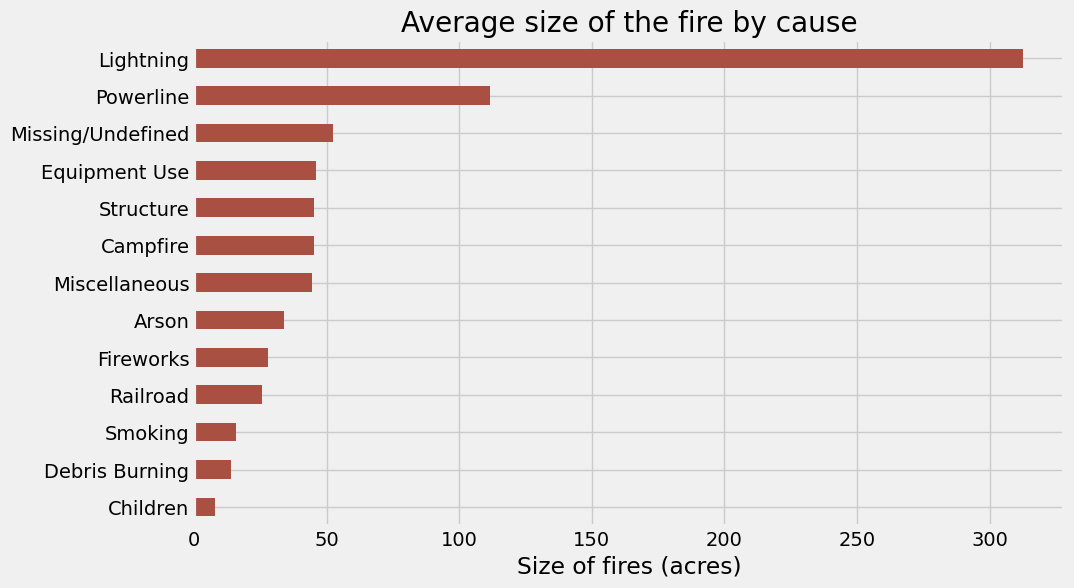

In [ ]:
# Size of the fire by cause
size_cause = df.groupby('STAT_CAUSE_DESCR')['FIRE_SIZE'].mean().sort_values()
plt.figure(figsize=(10, 6))
size_cause.plot(kind='barh', color='#AA5042')
plt.title('Average size of the fire by cause')
plt.xlabel('Size of fires (acres)')
plt.ylabel("");

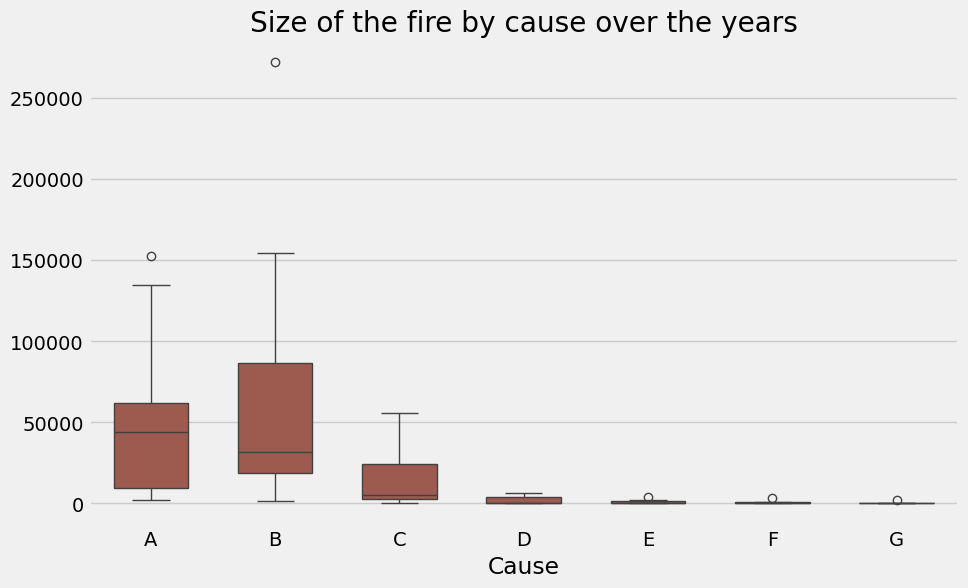

In [ ]:
# Taille des incendies par cause
df_boxplot3=df.groupby(['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
sns.boxplot(data=df_boxplot3, width=0.6, color='#AA5042')
plt.xlabel('Cause')
plt.title('Size of the fire by cause over the years');

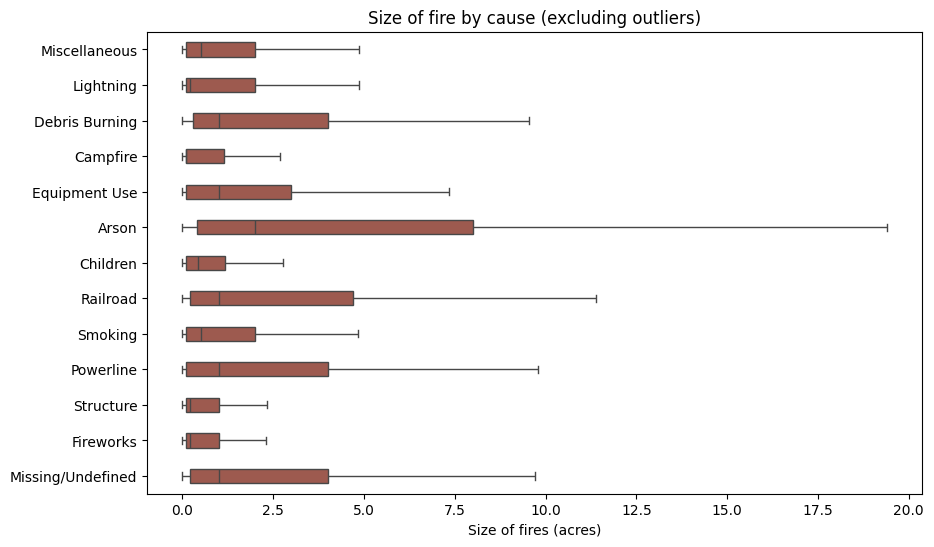

In [ ]:
# Size of fire by cause (without outliers)
import seaborn as sns
causes = df['STAT_CAUSE_DESCR'].unique()
plt.figure(figsize=(10, 6))
sns.boxplot(x='FIRE_SIZE', y='STAT_CAUSE_DESCR', data=df, order=causes, width=0.4, color='#AA5042', showfliers = False)
plt.title('Size of fire by cause (excluding outliers)')
plt.xlabel('Size of fires (acres)')
plt.ylabel('');

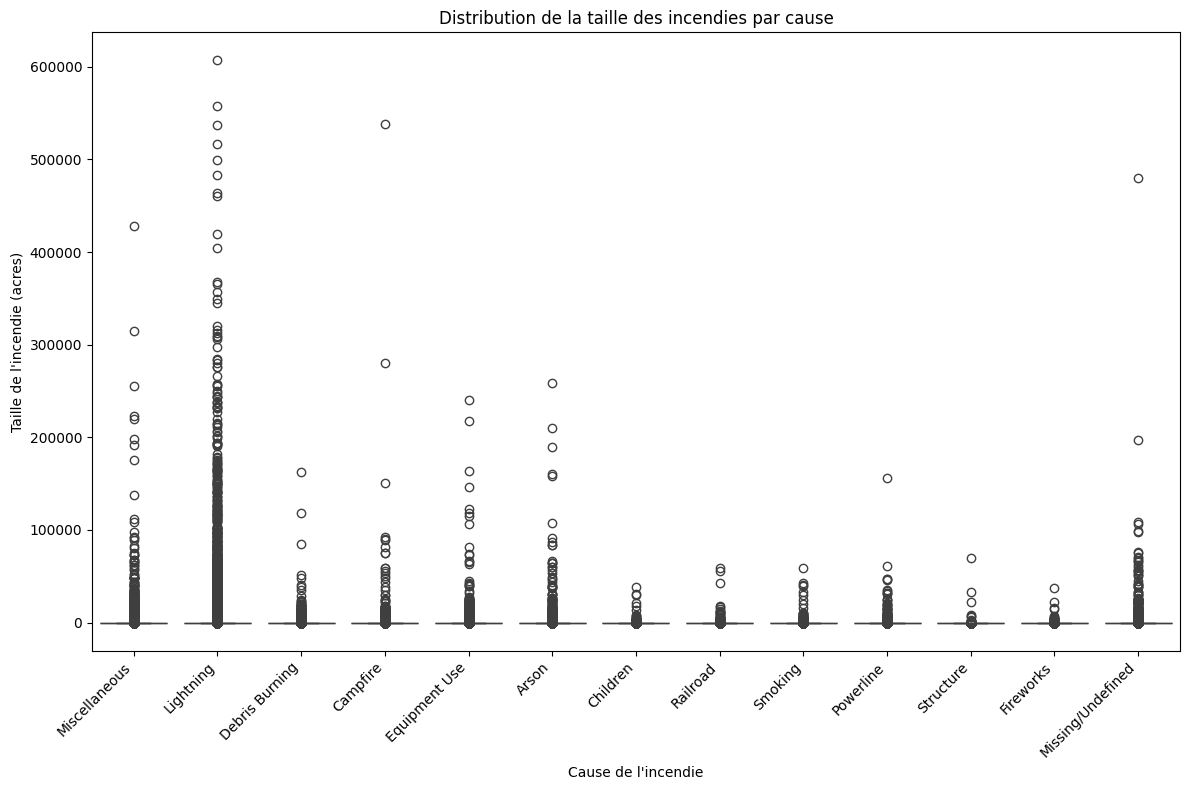

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer un boxplot pour chaque groupe de causes d'incendies
plt.figure(figsize=(12, 8))
sns.boxplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', data=df)
plt.title('Distribution de la taille des incendies par cause')
plt.xlabel('Cause de l\'incendie')
plt.ylabel('Taille de l\'incendie (acres)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Check numbers of fires per cause
# df['STAT_CAUSE_DESCR'].value_counts().sum()
nombre_arson = df[df['STAT_CAUSE_DESCR'] == 'Arson'].shape[0]
nombre_lightning = df[df['STAT_CAUSE_DESCR'] == 'Lightning'].shape[0]

# Compter le nombre total de feux
nombre_total = df.shape[0]

# Calculer le nombre de feux pour les autres origines
nombre_autres = nombre_total - nombre_arson

# Afficher les résultats
print("Nombre de feux d'origine criminel (arson) :", nombre_arson)
print("Nombre de feux d'origine criminel (lightning) :", nombre_lightning)

print("Nombre total de feux :", nombre_total)
print("Nombre de feux pour les autres origines :", nombre_autres)

Nombre de feux d'origine criminel (arson) : 281455
Nombre de feux d'origine criminel (lightning) : 278468
Nombre total de feux : 1880465
Nombre de feux pour les autres origines : 1599010


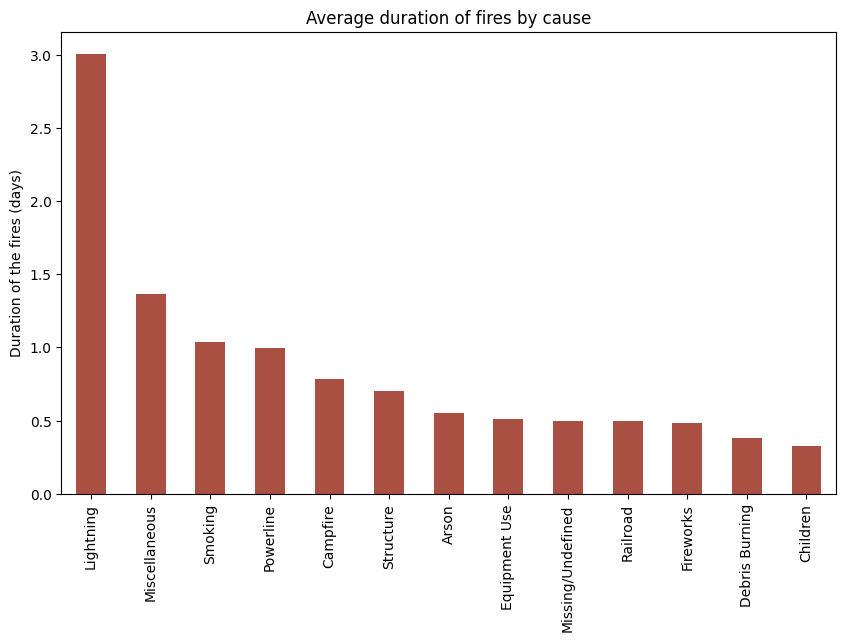

In [ ]:
# Average duration of the fires per cause
# Calculate the duration of the fires
df['DURATION'] = (df['DATE2'] - df['DATE']).dt.days
# Limit the dataframe to fires where the CONT_DATE is known
df_duration = df[df['DURATION'] >= 0]
average_duration = df_duration.groupby('STAT_CAUSE_DESCR')['DURATION'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_duration.plot(kind='bar', color='#AA5042')
plt.title('Average duration of fires by cause')
plt.ylabel('Duration of the fires (days)')
plt.xlabel('');

## **4. Test various**

In [ ]:
print(df['DURATION'].unique())
df['DURATION'].describe()

[0.000e+00 5.000e+00 1.000e+00 1.500e+01 4.000e+00       nan 3.000e+00
 2.000e+00 8.000e+00 1.000e+01 6.000e+00 2.400e+01 2.600e+01 1.300e+01
 9.000e+00 7.000e+00 2.200e+01 1.100e+01 2.000e+01 1.200e+01 1.900e+01
 1.700e+01 9.200e+01 1.600e+01 2.800e+01 1.400e+01 2.300e+01 3.100e+01
 4.500e+01 3.800e+01 3.200e+01 4.600e+01 2.900e+01 2.700e+01 6.500e+01
 5.000e+01 5.600e+01 2.500e+01 6.600e+01 4.400e+01 8.100e+01 5.900e+01
 5.800e+01 5.700e+01 5.500e+01 5.300e+01 5.200e+01 5.100e+01 9.100e+01
 8.900e+01 1.260e+02 9.300e+01 3.500e+01 3.000e+01 3.400e+01 7.000e+01
 4.700e+01 2.100e+01 9.500e+01 1.240e+02 7.600e+01 3.600e+01 9.000e+01
 5.400e+01 6.000e+01 4.800e+01 7.300e+01 1.800e+01 8.500e+01 6.300e+01
 8.400e+01 3.300e+01 7.900e+01 7.800e+01 7.500e+01 8.800e+01 4.000e+01
 4.100e+01 8.700e+01 8.300e+01 1.440e+02 1.330e+02 9.400e+01 6.400e+01
 7.700e+01 1.390e+02 4.200e+01 9.600e+01 3.700e+01 8.200e+01 8.000e+01
 6.700e+01 1.280e+02 1.500e+02 1.040e+02 3.900e+01 1.090e+02 4.300e+01
 1.020

min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
mean          1.233722
std          15.618890
max        4018.000000
count    988934.000000
Name: DURATION, dtype: float64

In [ ]:
df_interest = df[["FOD_ID", "FPA_ID", "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME", "STAT_CAUSE_CODE", "STAT_CAUSE_DESCR", "CONT_DATE", "CONT_DOY", "CONT_TIME", "FIRE_SIZE", "FIRE_SIZE_CLASS", "LATITUDE", "LONGITUDE", "STATE", "COUNTY", "FIPS_CODE", "FIPS_NAME"]]
df_interest.head()
df_interest["DISCO_DATE"] = df_interest["FIRE_YEAR"]*1000 + df_interest["DISCOVERY_DOY"]
df_interest["DISCO_DATE"] = pd.to_datetime(df_interest["DISCO_DATE"], format = "%Y%j")
df_interest[["DISCOVERY_DATE", "FIRE_YEAR", "DISCOVERY_DOY", "DISCO_DATE"]].head()

<ipython-input-20-7651c6a6174a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest["DISCO_DATE"] = df_interest["FIRE_YEAR"]*1000 + df_interest["DISCOVERY_DOY"]
<ipython-input-20-7651c6a6174a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest["DISCO_DATE"] = pd.to_datetime(df_interest["DISCO_DATE"], format = "%Y%j")


,DISCOVERY_DATE,FIRE_YEAR,DISCOVERY_DOY,DISCO_DATE
OBJECTID,,,,
1,2453403.5,2005,33,2005-02-02
2,2453137.5,2004,133,2004-05-12
3,2453156.5,2004,152,2004-05-31
4,2453184.5,2004,180,2004-06-28
5,2453184.5,2004,180,2004-06-28


In [ ]:
# control date from YEAR + DoY into Gregorian date format
df_interest["CONTROL_DATE"] = df_interest["FIRE_YEAR"]*1000 + df_interest["CONT_DOY"]
df_interest["CONTROL_DATE"] = pd.to_datetime(df_interest["CONTROL_DATE"], format = "%Y%j", errors='ignore')
#df_interest['CONTROL_DATE'].replace({np.nan:None}, inplace=True)
df_interest[["DISCOVERY_DATE", "FIRE_YEAR", "DISCO_DATE", "CONT_DOY", "CONTROL_DATE"]].sample(10)

<ipython-input-26-09b67d2fe541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest["CONTROL_DATE"] = df_interest["FIRE_YEAR"]*1000 + df_interest["CONT_DOY"]
<ipython-input-26-09b67d2fe541>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest["CONTROL_DATE"] = pd.to_datetime(df_interest["CONTROL_DATE"], format = "%Y%j", errors='ignore')


,DISCOVERY_DATE,FIRE_YEAR,DISCO_DATE,CONT_DOY,CONTROL_DATE
OBJECTID,,,,,
595833,2453802.5,2006,2006-03-08,NaN,NaT
56372,2449175.5,1993,1993-07-07,188.0,1993-07-07
1633712,2456180.5,2012,2012-09-10,NaN,NaT
810143,2453145.5,2004,2004-05-20,NaN,NaT
809130,2452956.5,2003,2003-11-13,NaN,NaT
1009302,2449416.5,1994,1994-03-05,NaN,NaT
509417,2454930.5,2009,2009-04-09,NaN,NaT
349978,2452847.5,2003,2003-07-27,208.0,2003-07-27
126417,2451750.5,2000,2000-07-25,210.0,2000-07-28


In [ ]:
df_interest['test_date'] = np.where(df_interest['CONTROL_DATE'] < df_interest['DISCO_DATE'], True, False)
#df_interest['CONTROL_DATEx'] = pd.to_datetime(df_interest['CONTROL_DATEx'], format = "%Y%j")
df_interest['CONTROL_DATEx'] = np.where(df_interest['test_date'], df_interest['CONTROL_DATE'] + pd.offsets.DateOffset(years=1), df_interest['CONTROL_DATE'])
df_interest.loc[df_interest['CONTROL_DATE'] != df_interest['CONTROL_DATEx']]


<ipython-input-29-4f4dbf337c9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['test_date'] = np.where(df_interest['CONTROL_DATE'] < df_interest['DISCO_DATE'], True, False)
<ipython-input-29-4f4dbf337c9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['CONTROL_DATEx'] = np.where(df_interest['test_date'], df_interest['CONTROL_DATE'] + pd.offsets.DateOffset(years=1), df_interest['CONTROL_DATE'])


,FOD_ID,FPA_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCO_DATE,CONTROL_DATE,test_date,CONTROL_DATEx
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,
85,86,FS-1419068,2005,2453555.5,185,0530,9.0,Miscellaneous,NaN,NaN,None,0.3,B,48.228056,-115.480278,MT,53,053,Lincoln,2005-07-04,NaT,False,NaT
1507,1521,FS-1422198,2005,2453440.5,70,1400,4.0,Campfire,NaN,NaN,None,0.1,A,37.029722,-92.125556,MO,67,067,Douglas,2005-03-11,NaT,False,NaT
1508,1522,FS-1422199,2005,2453440.5,70,1720,7.0,Arson,NaN,NaN,None,0.1,A,36.829722,-92.074167,MO,91,091,Howell,2005-03-11,NaT,False,NaT
1553,1567,FS-1422292,2005,2453444.5,74,1400,5.0,Debris Burning,NaN,NaN,None,0.5,B,36.671944,-92.599722,MO,153,153,Ozark,2005-03-15,NaT,False,NaT
1556,1570,FS-1422297,2005,2453445.5,75,1330,7.0,Arson,NaN,NaN,None,0.5,B,36.903889,-92.980556,MO,43,043,Christian,2005-03-16,NaT,False,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880455,300348310,2015CAIRS28424493,2015,2457277.5,255,0638,13.0,Missing/Undefined,NaN,NaN,None,2.0,B,38.048577,-120.313090,CA,None,None,None,2015-09-12,NaT,False,NaT
1880462,300348373,2015CAIRS29217935,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.2,A,37.617619,-120.938570,CA,None,None,None,2015-10-05,NaT,False,NaT
1880463,300348375,2015CAIRS28364460,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.1,A,37.617619,-120.938570,CA,None,None,None,2015-05-02,NaT,False,NaT


In [ ]:
df_interest.loc[df_interest['test_date']==True]

,FOD_ID,FPA_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCO_DATE,CONTROL_DATE,test_date,CONTROL_DATEx
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,
6474,6503,FS-1431059,2005,2453734.5,364,1500,3.0,Smoking,2453738.5,3.0,1000,0.30,B,33.576667,-108.729167,NM,3,003,Catron,2005-12-30,2005-01-03,True,2006-01-03
6713,6745,FS-1431668,2005,2453734.5,364,1730,7.0,Arson,2453736.5,1.0,0928,3.60,B,30.985556,-89.129444,MS,111,111,Perry,2005-12-30,2005-01-01,True,2006-01-01
6714,6746,FS-1431670,2005,2453735.5,365,1517,7.0,Arson,2453736.5,1.0,0800,0.10,A,31.081667,-89.068333,MS,111,111,Perry,2005-12-31,2005-01-01,True,2006-01-01
25281,25401,FS-1456768,2007,2454317.5,217,1900,1.0,Lightning,2454472.5,7.0,0900,11791.00,G,48.167222,-120.599444,WA,7,007,Chelan,2007-08-05,2007-01-07,True,2008-01-07
26510,26638,FS-1458256,2007,2454464.5,364,1622,9.0,Miscellaneous,2454468.5,3.0,0830,0.10,A,40.738611,-123.203611,CA,105,105,Trinity,2007-12-30,2007-01-03,True,2008-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782785,300138828,SFO-2014WADNR894,2014,2456977.5,320,1830,9.0,Miscellaneous,2457045.5,23.0,1430,37.00,C,47.309700,-123.472000,WA,045,045,Mason,2014-11-16,2014-01-23,True,2015-01-23
1782786,300138829,SFO-2014WADNR344,2014,2456854.5,197,1200,9.0,Miscellaneous,2457063.5,41.0,1200,0.02,A,48.067900,-119.897600,WA,047,047,Okanogan,2014-07-16,2014-02-10,True,2015-02-10
1782787,300138830,SFO-2014WADNR460,2014,2456870.5,213,1345,9.0,Miscellaneous,2457063.5,41.0,1200,579.00,E,48.412900,-120.146000,WA,047,047,Okanogan,2014-08-01,2014-02-10,True,2015-02-10


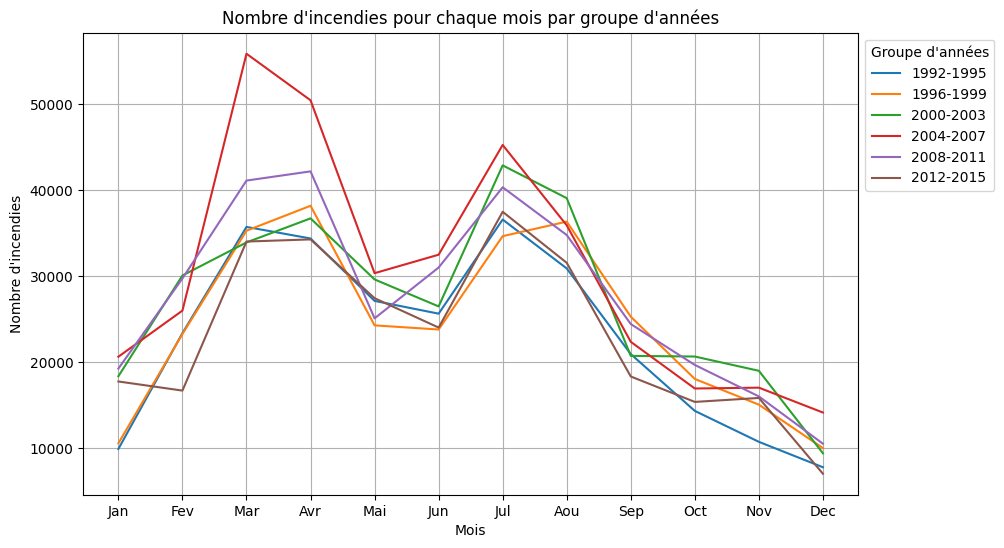

In [ ]:
df['YEAR_GROUP'] = df['FIRE_YEAR'] // 4 * 4

# Regrouper les données par groupe d'années et par mois et compter le nombre d'incendies dans chaque groupe
incendies_par_annee_groupe_mois = df.groupby(['YEAR_GROUP', 'MONTH']).size()

# Réinitialiser l'index pour faciliter la manipulation
incendies_par_annee_groupe_mois = incendies_par_annee_groupe_mois.reset_index()

# Tracer une courbe distincte pour chaque groupe d'années
plt.figure(figsize=(10, 6))
for year_group in incendies_par_annee_groupe_mois['YEAR_GROUP'].unique():
    data_year_group = incendies_par_annee_groupe_mois[incendies_par_annee_groupe_mois['YEAR_GROUP'] == year_group]
    plt.plot(data_year_group['MONTH'], data_year_group[0], label=f'{year_group}-{year_group+3}')

plt.xlabel('Mois')
plt.ylabel('Nombre d\'incendies')
plt.title('Nombre d\'incendies pour chaque mois par groupe d\'années')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Groupe d\'années', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import linregress
# Grouper les données par année et compter le nombre total d'incendies pour chaque année
incendies_par_annee = df.groupby('FIRE_YEAR').size()

# Calculer la régression linéaire pour modéliser la tendance temporelle
slope, intercept, r_value, p_value, std_err = linregress(incendies_par_annee.index, incendies_par_annee.values)

# Tester si la pente de la régression est significativement différente de zéro (test bilatéral)
alpha = 0.05
if p_value < alpha:
    print("La pente de la régression est significativement différente de zéro.")
else:
    print("La pente de la régression n'est pas significativement différente de zéro.")

La pente de la régression n'est pas significativement différente de zéro.


In [ ]:
df.FIRE_SIZE.describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: FIRE_SIZE, dtype: float64

## **5. Data transformation**

In [ ]:
# Determine unique 'SOURCE_SYSTEM_TYPE' to fill the exploratory table
df.SOURCE_SYSTEM_TYPE.unique()

array(['FED', 'NONFED', 'INTERAGCY'], dtype=object)

In [ ]:
# Visualization of rows with duplicated FPA_ID
dup = df['FPA_ID'].value_counts()[df['FPA_ID'].value_counts() > 1].index.to_list()
dup_FPA = df.loc[df['FPA_ID'].isin(dup)].sort_values('FPA_ID')
dup_FPA

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21987,22093,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,46,19,C64T,SAN MATEO,None,None,None,None,None,2007,2454299.5,199,1030,1.0,Lightning,2454307.5,207.0,1500,4.25,B,35.312778,-107.593056,5.0,USFS,NM,31,031,McKinley,b'\x00\x01\xad\x10\x00\x00L\xbaN\x9f\xf4\xe5Z\...
1565830,201432072,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,040,8,G0QG,SAN MATEO,None,None,None,None,None,2012,2456111.5,185,1500,1.0,Lightning,2456112.5,186.0,1400,0.10,A,35.337222,-107.779444,5.0,USFS,NM,031,031,McKinley,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xf1Z\...
1065674,1300088,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,Fort Riley,None,None,None,MA-KILO,KS-DDQ-128,MA-Kilo,KS3924309683820090219,MA-KILO,None,2009,2454881.5,50,1400,13.0,Missing/Undefined,2454881.5,50.0,1930,2490.00,F,39.234444,-96.830278,6.0,OTHER FEDERAL,KS,Riley,161,Riley,b'\x00\x01\xad\x10\x00\x00\xa4%VF#5X\xc00_\xd0...
1634980,201750002,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,Fort Riley,None,None,None,TRAINING AREA 60,KS-DDQ-128,Training Area 60,None,None,None,2012,2455990.5,64,1300,13.0,Missing/Undefined,2456020.5,94.0,1500,2200.00,F,39.220000,-96.940000,6.0,OTHER FEDERAL,KS,Riley,161,Riley,b'\x00\x01\xad\x10\x00\x00X\x8f\xc2\xf5(<X\xc0...
1825693,300245030,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,None,LNU003791,None,None,None,None,None,None,None,2015,2457154.5,132,1031,5.0,Debris Burning,2457154.5,132.0,1050,0.52,B,38.715883,-122.994933,15.0,UNDEFINED FEDERAL,CA,SONOMA,097,Sonoma,b'\x00\x01\xad\x10\x00\x00\x80-v\xfb\xac\xbf^\...
1870333,300306586,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,None,LNU003791,None,None,None,None,None,None,None,2015,2457204.5,182,1751,13.0,Missing/Undefined,NaN,NaN,None,0.01,A,38.342004,-121.958596,14.0,MISSING/NOT SPECIFIED,CA,SOLANO,095,Solano,b'\x00\x01\xad\x10\x00\x00\xe0\x84\t\xa3Y}^\xc...


In [ ]:
# Drop most of the columns
df = df[['FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'SOURCE_REPORTING_UNIT_NAME', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'STATE']]
df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,SOURCE_REPORTING_UNIT_NAME,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
OBJECTID,,,,,,,,,
1,FOUNTAIN,2005,2453403.5,Plumas National Forest,Miscellaneous,0.10,40.036944,-121.005833,CA
2,PIGEON,2004,2453137.5,Eldorado National Forest,Lightning,0.25,38.933056,-120.404444,CA
3,SLACK,2004,2453156.5,Eldorado National Forest,Debris Burning,0.10,38.984167,-120.735556,CA
4,DEER,2004,2453184.5,Eldorado National Forest,Lightning,0.10,38.559167,-119.913333,CA
5,STEVENOT,2004,2453184.5,Eldorado National Forest,Lightning,0.10,38.559167,-119.933056,CA


In [ ]:
# Convert 'DISCOVERY_DATE' from Julian date format to Gregorian date
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df.iloc[6473]

FOD_ID                                                                     6503
FPA_ID                                                               FS-1431059
SOURCE_SYSTEM_TYPE                                                          FED
SOURCE_SYSTEM                                                       FS-FIRESTAT
NWCG_REPORTING_AGENCY                                                        FS
NWCG_REPORTING_UNIT_ID                                                  USNMGNF
NWCG_REPORTING_UNIT_NAME                                   Gila National Forest
SOURCE_REPORTING_UNIT                                                      0306
SOURCE_REPORTING_UNIT_NAME                                 Gila National Forest
LOCAL_FIRE_REPORT_ID                                                        214
LOCAL_INCIDENT_ID                                                            54
FIRE_CODE                                                                  B94J
FIRE_NAME                               

In [ ]:
# Convert 'CONT_DATE' from Julian date format to Gregorian date
df['DATE2'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,DATE2
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-07-03
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-07-03


In [ ]:
df['YEAR2'] = df['DATE'].dt.year
comparison = df['FIRE_YEAR'] == df['YEAR2']
number_date_inconsistency = len(comparison) - comparison.sum()
print("Nombre de valeurs différentes entre 'FIRE_YEAR' et 'YEAR2':", number_date_inconsistency)
differences = df.loc[df['FIRE_YEAR'] != df['YEAR2'], ['FIRE_YEAR', 'YEAR2']]
print("Lignes où les valeurs de 'FIRE_YEAR' et 'YEAR2' sont différentes :")
print(differences)

Nombre de valeurs différentes entre 'FIRE_YEAR' et 'YEAR2': 0
Lignes où les valeurs de 'FIRE_YEAR' et 'YEAR2' sont différentes :
Empty DataFrame
Columns: [FIRE_YEAR, YEAR2]
Index: []


In [ ]:
df['FIRE_DURATION'] = (df['DATE2'] - df['DATE']).dt.days
df['FIRE_DURATION'].unique()

array([ 0.000e+00,  5.000e+00,  1.000e+00,  1.500e+01,  4.000e+00,
              nan,  3.000e+00,  2.000e+00,  8.000e+00,  1.000e+01,
        6.000e+00,  2.400e+01,  2.600e+01,  1.300e+01,  9.000e+00,
        7.000e+00,  2.200e+01,  1.100e+01,  2.000e+01,  1.200e+01,
        1.900e+01,  1.700e+01,  9.200e+01,  1.600e+01,  2.800e+01,
        1.400e+01,  2.300e+01,  3.100e+01,  4.500e+01,  3.800e+01,
        3.200e+01,  4.600e+01,  2.900e+01,  2.700e+01,  6.500e+01,
        5.000e+01,  5.600e+01,  2.500e+01,  6.600e+01,  4.400e+01,
        8.100e+01,  5.900e+01,  5.800e+01,  5.700e+01,  5.500e+01,
        5.300e+01,  5.200e+01,  5.100e+01,  9.100e+01,  8.900e+01,
        1.260e+02,  9.300e+01,  3.500e+01,  3.000e+01,  3.400e+01,
        7.000e+01,  4.700e+01,  2.100e+01,  9.500e+01,  1.240e+02,
        7.600e+01,  3.600e+01,  9.000e+01,  5.400e+01,  6.000e+01,
        4.800e+01,  7.300e+01,  1.800e+01,  8.500e+01,  6.300e+01,
        8.400e+01,  3.300e+01,  7.900e+01,  7.800e+01,  7.500e

In [ ]:
# Add 'MONTH' and 'DAY_OF_WEEK' columns
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,DATE2,DATE,YEAR,MONTH,DAY_OF_WEEK,YEAR2
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,2005-02-02,2005,2,2,2005
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12,2004,5,2,2004
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,2004-05-31,2004,5,0,2004
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-07-03,2004-06-28,2004,6,0,2004
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-07-03,2004-06-28,2004,6,0,2004


In [ ]:
# Check year inconsistency
comparison = df['FIRE_YEAR'] == df['YEAR']
number_date_inconsistency = len(comparison) - comparison.sum()
print("Nombre de valeurs différentes entre 'FIRE_YEAR' et 'YEAR':", number_date_inconsistency)
differences = df.loc[df['FIRE_YEAR'] != df['YEAR'], ['FIRE_YEAR', 'YEAR']]
print("Lignes où les valeurs de 'FIRE_YEAR' et 'YEAR' sont différentes :")
print(differences)

Nombre de valeurs différentes entre 'FIRE_YEAR' et 'YEAR': 0
Lignes où les valeurs de 'FIRE_YEAR' et 'YEAR' sont différentes :
Empty DataFrame
Columns: [FIRE_YEAR, YEAR]
Index: []


In [ ]:
# Check dtypes
df.dtypes

FIRE_NAME                             object
FIRE_YEAR                              int64
DISCOVERY_DATE                       float64
SOURCE_REPORTING_UNIT_NAME            object
STAT_CAUSE_DESCR                      object
FIRE_SIZE                            float64
LATITUDE                             float64
LONGITUDE                            float64
STATE                                 object
DATE                          datetime64[ns]
MONTH                                  int64
DAY_OF_WEEK                            int64
dtype: object

In [ ]:
# Fonction pour créer la date
import datetime
datetime

def create_date(row):
    return datetime.datetime(row['FIRE_YEAR'], 1, 1) + datetime.timedelta(days=row['DISCOVERY_DOY'] - 1)

# Appliquer la fonction à chaque ligne du DataFrame
df['DATE'] = df.apply(create_date, axis=1)
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,DATE2,DATE
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,2005-02-02
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,2004-05-31
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-07-03,2004-06-28
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-07-03,2004-06-28


## **6. Statistic test**

Test d'Anova

Question : Est ce que le mois de l’année à une influence sur le nombre d’incendie

HO : Il n'y a pas d'effet statistique du mois sur le nombre d'incendie

H1 : Il y a un effet significatif du mois sur le nombre d'incendie

In [ ]:
# Test ANOVA ('MONTH' <-> Number of fires)
import statsmodels.api
result = statsmodels.formula.api.ols(formula='FOD_ID ~ MONTH', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
print('Conclusion : la p-value est inférieure à 5% donc on rejette H0 et on conclut H1 ; le mois de l\'année à bien un effet sur le nombre d\'incendie')

,df,sum_sq,mean_sq,F,PR(>F)
MONTH,1.0,8.920727e+18,8.920727e+18,871.508747,1.696398e-191
Residual,1880463.0,1.924834e+22,1.023596e+16,NaN,NaN


Conclusion : la p-value est inférieure à 5% donc on rejette H0 et on conclut H1 ; le mois de l'année à bien un effet sur le nombre d'incendie


In [ ]:
# Test ANOVA
import statsmodels.api
result = statsmodels.formula.api.ols(formula='FOD_ID ~ C(MONTH)', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
C(MONTH),11.0,4.336728e+19,3.942480e+18,385.848322,0.0
Residual,1880453.0,1.921389e+22,1.021769e+16,NaN,NaN


## **7. Fire stations**

In [4]:
import pandas as pd
df_fire_stations = pd.read_csv("/content/drive/MyDrive/Data_Scientest/Fire_Stations.csv")
pd.set_option('display.max_columns', None)

df_fire_stations.head()

,X,Y,OBJECTID,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,SOURCE_ORIGINATOR,DATA_SECURITY,DISTRIBUTION_POLICY,LOADDATE,FTYPE,FCODE,NAME,ISLANDMARK,POINTLOCATIONTYPE,ADMINTYPE,ADDRESSBUILDINGNAME,ADDRESS,CITY,STATE,ZIPCODE,GNIS_ID,FOOT_ID,COMPLEX_ID,GLOBALID
0,-9.432090e+06,3.994355e+06,1,87259e63-d2f9-4d3b-8de5-1f95e0447d12,9999999999,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/08/12 14:05:14+00,740,74026,Douglas County Fire Marshal,NaN,1.0,NaN,NaN,8700 Hospital Dr,Douglasville,GA,30134,NaN,NaN,NaN,{8C831D9D-B4DA-4159-9E8F-5B7C878D78C0}
1,-9.097544e+06,3.965616e+06,2,814e6dcd-fcdf-41de-9ad6-2c92eec64da5,9999999999,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/08/12 14:05:14+00,740,74026,Aiken Public Safety Station 2,NaN,1.0,NaN,NaN,123 Silver Bluff Road,Aiken,SC,29801,NaN,NaN,NaN,{B6AEA169-E22A-4DD8-8BE4-C2843B91747C}
2,-1.029229e+07,4.182935e+06,3,{A445F01B-56B4-4806-B97D-D64DDABF3515},NaN,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/07/27 00:00:00+00,740,74026,BEAVERFORK VFD STATION 2,NaN,1.0,NaN,NaN,161 HWY 25,Conway,AR,72032,NaN,NaN,NaN,{5FFD726A-C8FA-4FC0-BB6C-90E83A648BE0}
3,-1.026426e+07,4.197372e+06,4,{E4293C16-8DD0-48A8-8CEA-9561EA55334B},NaN,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/07/27 00:00:00+00,740,74026,ENOLA VFD STATION 3,NaN,1.0,NaN,NaN,1 CARDIN CIR,Enola,AR,72047,NaN,NaN,NaN,{B9AC844E-0B5B-415A-9CCD-030865009498}
4,-8.794840e+06,4.264464e+06,5,{AFB434D5-53A8-4926-8B9F-B35964205B5C},NaN,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/07/27 00:00:00+00,740,74026,NORTH CHATHAM FIRE DEPT Station 16,NaN,1.0,NaN,NaN,"10214 US 64 East,",Apex,NC,27523,NaN,NaN,NaN,{F2E72EEB-39B3-481B-B022-7CA5E8DD0763}


In [ ]:
df_fire_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52184 entries, 0 to 52183
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     52184 non-null  float64
 1   Y                     52184 non-null  float64
 2   OBJECTID              52184 non-null  int64  
 3   PERMANENT_IDENTIFIER  52184 non-null  object 
 4   SOURCE_FEATUREID      42428 non-null  object 
 5   SOURCE_DATASETID      52184 non-null  object 
 6   SOURCE_DATADESC       52184 non-null  object 
 7   SOURCE_ORIGINATOR     52184 non-null  object 
 8   DATA_SECURITY         52184 non-null  int64  
 9   DISTRIBUTION_POLICY   52184 non-null  object 
 10  LOADDATE              52183 non-null  object 
 11  FTYPE                 52184 non-null  int64  
 12  FCODE                 52184 non-null  int64  
 13  NAME                  52184 non-null  object 
 14  ISLANDMARK            47025 non-null  float64
 15  POINTLOCATIONTYPE  

In [ ]:
import pyproj

# Créer un objet de transformation entre les systèmes de coordonnées
transformateur = pyproj.Transformer.from_crs('epsg:3857', 'epsg:4269', always_xy=True)

# Coordonnées en WGS84 Web Mercator à convertir en NAD83
X = -9432090
Y = 3994355

# Convertir les coordonnées en NAD83
longitude_nad83, latitude_nad83 = transformateur.transform(X, Y)

print("Coordonnées NAD83 :")
print("Latitude :", latitude_nad83)
print("Longitude :", longitude_nad83)

Coordonnées NAD83 :
Latitude : 33.74307329257969
Longitude : -84.72990608190896


In [ ]:
import pandas as pd
import pyproj

# Créer un objet de transformation entre les systèmes de coordonnées
transformateur = pyproj.Transformer.from_crs('epsg:3857', 'epsg:4269', always_xy=True)

# Fonction pour convertir les coordonnées de WGS84 Web Mercator en NAD83
def convert_coordinates(row):
    x = row['X']
    y = row['Y']
    longitude_nad83, latitude_nad83 = transformateur.transform(x, y)
    return pd.Series({'Longitude_NAD83': longitude_nad83, 'Latitude_NAD83': latitude_nad83})

# Appliquer la fonction à chaque ligne du DataFrame
df_fire_stations[['Longitude_NAD83', 'Latitude_NAD83']] = df_fire_stations.apply(convert_coordinates, axis=1)

# Afficher le DataFrame avec les nouvelles coordonnées NAD83
df_fire_stations.head()

,X,Y,OBJECTID,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,SOURCE_ORIGINATOR,DATA_SECURITY,DISTRIBUTION_POLICY,LOADDATE,FTYPE,FCODE,NAME,ISLANDMARK,POINTLOCATIONTYPE,ADMINTYPE,ADDRESSBUILDINGNAME,ADDRESS,CITY,STATE,ZIPCODE,GNIS_ID,FOOT_ID,COMPLEX_ID,GLOBALID,Longitude_NAD83,Latitude_NAD83
0,-9.432090e+06,3.994355e+06,1,87259e63-d2f9-4d3b-8de5-1f95e0447d12,9999999999,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/08/12 14:05:14+00,740,74026,Douglas County Fire Marshal,NaN,1.0,NaN,NaN,8700 Hospital Dr,Douglasville,GA,30134,NaN,NaN,NaN,{8C831D9D-B4DA-4159-9E8F-5B7C878D78C0},-84.729903,33.743074
1,-9.097544e+06,3.965616e+06,2,814e6dcd-fcdf-41de-9ad6-2c92eec64da5,9999999999,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/08/12 14:05:14+00,740,74026,Aiken Public Safety Station 2,NaN,1.0,NaN,NaN,123 Silver Bluff Road,Aiken,SC,29801,NaN,NaN,NaN,{B6AEA169-E22A-4DD8-8BE4-C2843B91747C},-81.724630,33.528127
2,-1.029229e+07,4.182935e+06,3,{A445F01B-56B4-4806-B97D-D64DDABF3515},NaN,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/07/27 00:00:00+00,740,74026,BEAVERFORK VFD STATION 2,NaN,1.0,NaN,NaN,161 HWY 25,Conway,AR,72032,NaN,NaN,NaN,{5FFD726A-C8FA-4FC0-BB6C-90E83A648BE0},-92.457238,35.140089
3,-1.026426e+07,4.197372e+06,4,{E4293C16-8DD0-48A8-8CEA-9561EA55334B},NaN,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/07/27 00:00:00+00,740,74026,ENOLA VFD STATION 3,NaN,1.0,NaN,NaN,1 CARDIN CIR,Enola,AR,72047,NaN,NaN,NaN,{B9AC844E-0B5B-415A-9CCD-030865009498},-92.205400,35.246074
4,-8.794840e+06,4.264464e+06,5,{AFB434D5-53A8-4926-8B9F-B35964205B5C},NaN,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016/07/27 00:00:00+00,740,74026,NORTH CHATHAM FIRE DEPT Station 16,NaN,1.0,NaN,NaN,"10214 US 64 East,",Apex,NC,27523,NaN,NaN,NaN,{F2E72EEB-39B3-481B-B022-7CA5E8DD0763},-79.005394,35.736785


In [ ]:
# Test sur un échantillon de 20 incendies
df1 = df.sample(20)
df1

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63587,64236,FS-288881,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,221,None,None,None,None,None,None,None,None,1994,2449571.5,219,0824,1.0,Lightning,2449571.5,219.0,1430,0.10,A,45.913333,-115.321667,5.0,USFS,ID,None,None,None,b'\x00\x01\xad\x10\x00\x00<\xf7\xcc/\x96\xd4\\...
1154342,1405265,ALS-BWT-20030127-005,NONFED,ST-ALALS,ST/C&L,USALALS,Alabama Forestry Commission,ALBWT,AFC Brewton,005,BWT-20030127-005,None,None,None,None,None,None,None,2003,2452666.5,27,1514,5.0,Debris Burning,2452666.5,27.0,1626,22.40,C,31.004788,-87.572994,14.0,MISSING/NOT SPECIFIED,AL,Escambia,053,Escambia,b'\x00\x01\xad\x10\x00\x00t\xb3\x06\xef\xab\xe...
1795315,300206675,FS-6338189,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,147,022,EK12,SPOON,None,None,None,None,None,2015,2457236.5,214,1230,1.0,Lightning,2457236.5,214.0,2000,2.70,B,39.753056,-121.285556,8.0,PRIVATE,CA,007,007,Butte,b'\x00\x01\xad\x10\x00\x00\x04\xd9\xd3\x8aFR^\...
1867308,300302462,HIWMO-OA6709,INTERAGCY,IA-HIWMO,ST/C&L,USHICNTY,Hawaii Counties,HICNTY,Honolulu Fire Dept,None,None,None,None,None,None,None,None,None,2011,2455761.5,200,None,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,21.333462,-157.722031,14.0,MISSING/NOT SPECIFIED,HI,Oahu,003,Honolulu,b'\x00\x01\xad\x10\x00\x00\xc2\xb6\xea\xdf\x1a...
1589673,201607024,SFO-SC-2012-13NF0148,NONFED,ST-NASF,ST/C&L,USSCSCS,South Carolina Forestry Commission,SCSCS,South Carolina Forestry Commission,None,13NF0148,None,None,None,None,None,None,None,2012,2456257.5,331,1258,5.0,Debris Burning,2456257.5,331.0,1411,5.00,B,34.142738,-82.078308,8.0,PRIVATE,SC,Greenwood County,047,Greenwood,b'\x00\x01\xad\x10\x00\x00\xf4\xc0\x8e\xff\x02...
1107222,1348364,CDF_2004_54_2235_013974,NONFED,ST-CACDF,ST/C&L,USCAAEU,Amador-El Dorado Unit,CAAEU,Amador-El Dorado Unit,None,013974,None,BARNEY,None,None,None,None,None,2004,2453230.5,226,None,2.0,Equipment Use,NaN,NaN,None,4.00,B,38.448889,-120.991111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xbc\tK]n?^\xc0\xb0\...
140170,141546,FS-367753,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,41,None,6300,ZOT,None,None,None,None,None,2001,2452101.5,192,0730,1.0,Lightning,2452101.5,192.0,1400,0.10,A,41.284722,-122.217222,5.0,USFS,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb7\x06\xf8\xe6\x8...
1292577,1763340,SFO-NY-NY0816-2008-2008662,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY0816,Fire Department of New York,None,NY0816-2008-2008662,None,None,None,None,None,None,None,2008,2454773.5,308,1400,3.0,Smoking,2454773.5,308.0,1400,0.10,A,42.193563,-76.822131,14.0,MISSING/NOT SPECIFIED,NY,CHEMUNG,015,Chemung,b'\x00\x01\xad\x10\x00\x00X\x9e\xcd\xcb\x9d4S\...
1457446,20023671,FS-1499301,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,0507,Los Padres National Forest,26,None,EK1Y,LOCK,CA-LPF-2323,MPRD Lightning Plan,None,None,MPRD LIGHTNING PLAN COMPLEX,2011,2455814.5,253,1145,1.0,Lightning,2455814.5,253.0,1205,0.25,A,34.783056,-119.044444,5.0,USFS,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00|\x12~-\xd8\xc2]\xc0...


In [ ]:
# Filtre sur les feux extrêmes (FIRE_SIZE_CLASS = G)
df_xtrem_fire = df[df['FIRE_SIZE_CLASS'] > 'F']
df_xtrem_fire_.info()
df_xtrem_fire.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 17 to 1878524
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FOD_ID                      3773 non-null   int64  
 1   FPA_ID                      3773 non-null   object 
 2   SOURCE_SYSTEM_TYPE          3773 non-null   object 
 3   SOURCE_SYSTEM               3773 non-null   object 
 4   NWCG_REPORTING_AGENCY       3773 non-null   object 
 5   NWCG_REPORTING_UNIT_ID      3773 non-null   object 
 6   NWCG_REPORTING_UNIT_NAME    3773 non-null   object 
 7   SOURCE_REPORTING_UNIT       3773 non-null   object 
 8   SOURCE_REPORTING_UNIT_NAME  3773 non-null   object 
 9   LOCAL_FIRE_REPORT_ID        1458 non-null   object 
 10  LOCAL_INCIDENT_ID           1011 non-null   object 
 11  FIRE_CODE                   2724 non-null   object 
 12  FIRE_NAME                   3676 non-null   object 
 13  ICS_209_INCIDENT_NUMBER     2

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,109,23,,POWER,CA-ENF-017646,POWER,CA3850212028020041006,POWER,None,2004,2453284.5,280,1415,2.0,Equipment Use,2453299.5,295.0,1000,16823.0,G,38.523333,-120.211667,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\r^\xc0\...
18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,111,35,BHA3,FREDS,CA-ENF-18044,FREDS,CA3878712031820041013,FREDS,None,2004,2453291.5,287,1618,2.0,Equipment Use,2453295.5,291.0,1800,7700.0,G,38.780000,-120.260000,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00p=\n\xd7\xa3\x10^\xc...
189,192,FS-1419313,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,62,4,BVR2,THREE,AZ-TNF-105,THREE FIRE COMPLEX,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),THREE FIRE COMPLEX,2005,2453542.5,172,1400,1.0,Lightning,2453550.5,180.0,1800,16100.0,G,33.723333,-111.275000,5.0,USFS,AZ,7,007,Gila,b'\x00\x01\xad\x10\x00\x00\x98\x99\x99\x99\x99...
1506,1520,FS-1422195,FED,FS-FIRESTAT,FS,USNMGNF,Gila National Forest,0306,Gila National Forest,21,05,BS5G,FORK,NM-GNF-021,Fork WFU,NM3364710851120050529,FORK WFU,NORTH GILA COMPLEX,2005,2453519.5,149,1505,1.0,Lightning,2453611.5,241.0,1159,11936.0,G,33.613333,-108.558889,5.0,USFS,NM,3,003,Catron,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4#[\xc0...
1589,1603,FS-1422367,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,0212,Pike San Isabel National Forest,51,004,BY23,MASON,CO-PSF-000683,MASON,CO3816010503620050706,MASON,None,2005,2453558.5,188,0600,1.0,Lightning,2453567.5,197.0,2000,11357.0,G,38.169722,-105.038056,5.0,USFS,CO,None,None,None,"b""\x00\x01\xad\x10\x00\x00`h\x96\x80oBZ\xc0\x0..."


In [ ]:
df_xtrem_fire['STATE'].value_counts()

AK    650
CA    394
ID    394
NV    295
OR    256
TX    238
NM    236
MT    223
AZ    176
WA    152
UT    144
FL    126
WY     96
OK     81
CO     68
SD     57
KS     42
NE     33
MN     26
LA     16
GA     14
ND     10
HI      9
NC      9
VA      6
MI      6
NJ      4
MS      3
AR      2
KY      2
SC      1
TN      1
WV      1
NY      1
WI      1
Name: STATE, dtype: int64

In [ ]:
df_xtrem_fire_CA = df[(df['FIRE_SIZE_CLASS'] > 'F') & (df['STATE'] == 'CA')]
df_xtrem_fire_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 17 to 1878524
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FOD_ID                      394 non-null    int64  
 1   FPA_ID                      394 non-null    object 
 2   SOURCE_SYSTEM_TYPE          394 non-null    object 
 3   SOURCE_SYSTEM               394 non-null    object 
 4   NWCG_REPORTING_AGENCY       394 non-null    object 
 5   NWCG_REPORTING_UNIT_ID      394 non-null    object 
 6   NWCG_REPORTING_UNIT_NAME    394 non-null    object 
 7   SOURCE_REPORTING_UNIT       394 non-null    object 
 8   SOURCE_REPORTING_UNIT_NAME  394 non-null    object 
 9   LOCAL_FIRE_REPORT_ID        259 non-null    object 
 10  LOCAL_INCIDENT_ID           170 non-null    object 
 11  FIRE_CODE                   272 non-null    object 
 12  FIRE_NAME                   393 non-null    object 
 13  ICS_209_INCIDENT_NUMBER     30

In [ ]:
# Determine the distance from Xtrem fire to the Fire Station
import pandas as pd
from geopy.distance import geodesic

# Charger les données sur les incendies et les stations de pompiers dans des DataFrames pandas
#df_incendies = pd.read_csv('data_incendies.csv')
#df_fire_stations = pd.read_csv('data_fire_stations.csv')

# Convertir les coordonnées en NAD83
longitude_nad83, latitude_nad83 = transformateur.transform(df_fire_stations['X'],df_fire_stations['Y'])


# Fonction pour calculer la distance entre deux coordonnées géographiques en utilisant la fonction geodesic
def distance_geodesic(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculer les distances entre chaque incendie et chaque station de pompiers
for index_incendie, incendie in df_xtrem_fire_CA.iterrows():
    distances = []
    coord_incendie = (incendie['LATITUDE'], incendie['LONGITUDE'])
    for index_station, station in df_fire_stations.iterrows():
        coord_station = (station['Latitude_NAD83'], station['Longitude_NAD83'])  # Utiliser les coordonnées NAD83
        distance = distance_geodesic(coord_incendie, coord_station)
        distances.append(distance)
    # Trouver l'index de la station de pompiers la plus proche
    index_station_proche = distances.index(min(distances))
    # Ajouter la station de pompiers la plus proche et sa distance au DataFrame d'incendies
    station_proche = df_fire_stations.at[index_station_proche, 'NAME']
    distance_proche = min(distances)
    df_xtrem_fire_CA.at[index_incendie, 'STATION_PROCHE'] = station_proche
    df_xtrem_fire_CA.at[index_incendie, 'DISTANCE_PROCHE'] = distance_proche

# Afficher le DataFrame d'incendies avec la station de pompiers la plus proche et la distance
display(distance_proche)
display(station_proche)
df_xtrem_fire_CA['DISTANCE_PROCHE'].describe()

<ipython-input-26-611756fc2f66>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xtrem_fire_CA.at[index_incendie, 'STATION_PROCHE'] = station_proche
<ipython-input-26-611756fc2f66>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xtrem_fire_CA.at[index_incendie, 'DISTANCE_PROCHE'] = distance_proche


5.893298305938066

'Chico Fire Department Station 5'

count    394.000000
mean      10.652028
std        8.776241
min        0.442539
25%        4.661336
50%        8.107664
75%       13.917426
max       64.427979
Name: DISTANCE_PROCHE, dtype: float64

In [ ]:
import pandas as pd
from geopy.distance import geodesic

# Charger les données sur les incendies et les stations de pompiers dans des DataFrames pandas
#df_incendies = pd.read_csv('data_incendies.csv')
#df_fire_stations = pd.read_csv('data_fire_stations.csv')

# Convertir les coordonnées en NAD83
longitude_nad83, latitude_nad83 = transformateur.transform(df_fire_stations['X'],df_fire_stations['Y'])


# Fonction pour calculer la distance entre deux coordonnées géographiques en utilisant la fonction geodesic
def distance_geodesic(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculer les distances entre chaque incendie et chaque station de pompiers
for index_incendie, incendie in df1.iterrows():
    distances = []
    coord_incendie = (incendie['LATITUDE'], incendie['LONGITUDE'])
    for index_station, station in df_fire_stations.iterrows():
        coord_station = (station['Latitude_NAD83'], station['Longitude_NAD83'])  # Utiliser les coordonnées NAD83
        distance = distance_geodesic(coord_incendie, coord_station)
        distances.append(distance)
    # Trouver l'index de la station de pompiers la plus proche
    index_station_proche = distances.index(min(distances))
    # Ajouter la station de pompiers la plus proche et sa distance au DataFrame d'incendies
    station_proche = df_fire_stations.at[index_station_proche, 'NAME']
    distance_proche = min(distances)
    df1.at[index_incendie, 'STATION_PROCHE'] = station_proche
    df1.at[index_incendie, 'DISTANCE_PROCHE'] = distance_proche

# Afficher le DataFrame d'incendies avec la station de pompiers la plus proche et la distance
display(distance_proche)
display(station_proche)
df1

0.19648297901724118

'Hintonville Volunteer Fire Department'

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,STATION_PROCHE,DISTANCE_PROCHE
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63587,64236,FS-288881,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,221,None,None,None,None,None,None,None,None,1994,2449571.5,219,0824,1.0,Lightning,2449571.5,219.0,1430,0.10,A,45.913333,-115.321667,5.0,USFS,ID,None,None,None,b'\x00\x01\xad\x10\x00\x00<\xf7\xcc/\x96\xd4\\...,Elk City Volunteer Fire Department,13.423571
1154342,1405265,ALS-BWT-20030127-005,NONFED,ST-ALALS,ST/C&L,USALALS,Alabama Forestry Commission,ALBWT,AFC Brewton,005,BWT-20030127-005,None,None,None,None,None,None,None,2003,2452666.5,27,1514,5.0,Debris Burning,2452666.5,27.0,1626,22.40,C,31.004788,-87.572994,14.0,MISSING/NOT SPECIFIED,AL,Escambia,053,Escambia,b'\x00\x01\xad\x10\x00\x00t\xb3\x06\xef\xab\xe...,Nokomis Volunteer Fire Department,2.344710
1795315,300206675,FS-6338189,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,147,022,EK12,SPOON,None,None,None,None,None,2015,2457236.5,214,1230,1.0,Lightning,2457236.5,214.0,2000,2.70,B,39.753056,-121.285556,8.0,PRIVATE,CA,007,007,Butte,b'\x00\x01\xad\x10\x00\x00\x04\xd9\xd3\x8aFR^\...,Butte County Fire Department Station 60,8.138138
1867308,300302462,HIWMO-OA6709,INTERAGCY,IA-HIWMO,ST/C&L,USHICNTY,Hawaii Counties,HICNTY,Honolulu Fire Dept,None,None,None,None,None,None,None,None,None,2011,2455761.5,200,None,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,21.333462,-157.722031,14.0,MISSING/NOT SPECIFIED,HI,Oahu,003,Honolulu,b'\x00\x01\xad\x10\x00\x00\xc2\xb6\xea\xdf\x1a...,Honolulu Fire Department Station 27 Waimanalo,1.684501
1589673,201607024,SFO-SC-2012-13NF0148,NONFED,ST-NASF,ST/C&L,USSCSCS,South Carolina Forestry Commission,SCSCS,South Carolina Forestry Commission,None,13NF0148,None,None,None,None,None,None,None,2012,2456257.5,331,1258,5.0,Debris Burning,2456257.5,331.0,1411,5.00,B,34.142738,-82.078308,8.0,PRIVATE,SC,Greenwood County,047,Greenwood,b'\x00\x01\xad\x10\x00\x00\xf4\xc0\x8e\xff\x02...,Highway 34 Volunteer Fire Department Station 75,3.483068
1107222,1348364,CDF_2004_54_2235_013974,NONFED,ST-CACDF,ST/C&L,USCAAEU,Amador-El Dorado Unit,CAAEU,Amador-El Dorado Unit,None,013974,None,BARNEY,None,None,None,None,None,2004,2453230.5,226,None,2.0,Equipment Use,NaN,NaN,None,4.00,B,38.448889,-120.991111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xbc\tK]n?^\xc0\xb0\...,Amador Fire Protection District Station 121,6.852919
140170,141546,FS-367753,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,41,None,6300,ZOT,None,None,None,None,None,2001,2452101.5,192,0730,1.0,Lightning,2452101.5,192.0,1400,0.10,A,41.284722,-122.217222,5.0,USFS,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb7\x06\xf8\xe6\x8...,McCloud Fire Department,7.204025
1292577,1763340,SFO-NY-NY0816-2008-2008662,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY0816,Fire Department of New York,None,NY0816-2008-2008662,None,None,None,None,None,None,None,2008,2454773.5,308,1400,3.0,Smoking,2454773.5,308.0,1400,0.10,A,42.193563,-76.822131,14.0,MISSING/NOT SPECIFIED,NY,CHEMUNG,015,Chemung,b'\x00\x01\xad\x10\x00\x00X\x9e\xcd\xcb\x9d4S\...,Town and Country Volunteer Fire Department Sta...,2.080301
1457446,20023671,FS-1499301,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,0507,Los Padres National Forest,26,None,EK1Y,LOCK,CA-LPF-2323,MPRD Lightning Plan,None,None,MPRD LIGHTNING PLAN COMPLEX,2011,2455814.5,2

In [ ]:
# Fonction pour calculer la distance entre deux coordonnées géographiques en utilisant la fonction geodesic
def distance_geodesic(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Initialiser une colonne pour la station de pompiers la plus proche et la distance dans le DataFrame des incendies
df1['STATION_PROCHE'] = ''
df1['DISTANCE_PROCHE'] = float('inf')

# Calculer les distances entre chaque incendie et chaque station de pompiers
for index_incendie, incendie in df1.iterrows():
    coord_incendie = (incendie['LATITUDE'], incendie['LONGITUDE'])
    for index_station, station in df_fire_stations.iterrows():
        coord_station = (station['Latitude_NAD83'], station['Longitude_NAD83'])  # Utiliser les coordonnées NAD83
        distance = distance_geodesic(coord_incendie, coord_station)
        if distance < df1.at[index_incendie, 'DISTANCE_PROCHE']:
            df1.at[index_incendie, 'STATION_PROCHE'] = station['NAME']
            df1.at[index_incendie, 'DISTANCE_PROCHE'] = distance

# Afficher le DataFrame d'incendies avec la station de pompiers la plus proche et la distance
df1

In [ ]:
# Fonction pour calculer la distance entre deux coordonnées géographiques en utilisant la fonction geodesic
def distance_geodesic(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Initialiser une colonne pour la station de pompiers la plus proche et la distance dans le DataFrame des incendies
df['STATION_PROCHE'] = ''
df['DISTANCE_PROCHE'] = float('inf')

# Calculer les distances entre chaque incendie et chaque station de pompiers
for index_incendie, incendie in df.iterrows():
    coord_incendie = (incendie['LATITUDE'], incendie['LONGITUDE'])
    for index_station, station in df_fire_stations.iterrows():
        coord_station = (station['Latitude_NAD83'], station['Longitude_NAD83'])  # Utiliser les coordonnées NAD83
        distance = distance_geodesic(coord_incendie, coord_station)
        if distance < df.at[index_incendie, 'DISTANCE_PROCHE']:
            df.at[index_incendie, 'STATION_PROCHE'] = station['NAME']
            df.at[index_incendie, 'DISTANCE_PROCHE'] = distance

# Afficher le DataFrame d'incendies avec la station de pompiers la plus proche et la distance
df.sample(20)

In [ ]:
import geopy.distance

coords_1 = (40.036944, -121.005833)
coords_2 = (33.743073, -84.729906)

print(geopy.distance.geodesic(coords_1, coords_2).km)

3284.394836376904
